In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
import statsmodels.api as sm 
import pylab as py 
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("walmart_data.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
data.info()
# User_ID, Occupation, Marital Status, Product_Category and Purchase are of integer data type.
# Product_ID, Gender, Age, City_Category and Stay_In_Current_City_Years are of object data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
# Converting the columns User_ID, Occupation, Marital Status, Product Category to object datatypes as they
# all are categorical variables.
data["User_ID"]= data["User_ID"].astype(str)
data["Occupation"]= data["Occupation"].astype(str)
data["Marital_Status"]= data["Marital_Status"].astype(str)
data["Product_Category"]= data["Product_Category"].astype(str)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [6]:
data.shape
# There are 10 columns and 550068 records in the dataset.

(550068, 10)

In [7]:
data.isna().sum(axis = 0)
# There are no missing values in the dataset.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
data[["User_ID", "Product_ID"]].drop_duplicates()
# The dataset consists of unique combinations of User_ID and Product_ID in each row. That is why the
# length of the above dataframe remains unchanged after removing duplicates.

,User_ID,Product_ID
0,1000001,P00069042
1,1000001,P00248942
2,1000001,P00087842
3,1000001,P00085442
4,1000002,P00285442
...,...,...
550063,1006033,P00372445
550064,1006035,P00375436
550065,1006036,P00375436
550066,1006038,P00375436


In [9]:
data.describe()
# The minimum amount spent by a customer on a particular product id is 12
# The maximum amount spent by a customer on a particular product id is 23961

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [10]:
data.describe(include = "object")
# There are 5891 distinct users. User_ID has purchased across a total of 1026 product_ids.
# There are 3631 distinct product_id's. Product id P00265242 has been purchased by 1880 users.
# There are 2 genders in the dataset.
# There are 7 age groups in the dataset.
# There are 21 Occupation categories in the dataset.
# There are 3 City categories in the dataset.
# Users in the dataset have 2 marital status.
# There are 20 distinct product categories in the dataset.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [11]:
user_prof = data[["User_ID", "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years","Marital_Status"]].\
drop_duplicates().reset_index(drop = True)
user_prof

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0
5887,1004871,M,18-25,12,C,2,0
5888,1004113,M,36-45,17,C,3,0
5889,1005391,M,26-35,7,A,0,0


In [12]:
user_prof.describe()
# Of the 5891 users, 4225 are Males and rmaining are Females.
# Of the total users, 2053 are in the age group 26-35.
# 740 of the total users belong to catgory 4 of Occupation (maximum in a occupation category).
# 3139 of the total users live in City_Category C
# 2086 users have been staying in their current city for a year.
# 3417 of the users belong to the Marital_Status 0 (Unmarried)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
count,5891,5891,5891,5891,5891,5891,5891
unique,5891,2,7,21,3,5,2
top,1000001,M,26-35,4,C,1,0
freq,1,4225,2053,740,3139,2086,3417


In [13]:
# Getting the count of users across categories in different attributes
for i in (user_prof.columns[1:]):
    print(user_prof[i].value_counts())   
    print()

M    4225
F    1666
Name: Gender, dtype: int64

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

0    3417
1    2474
Name: Marital_Status, dtype: int64



In [14]:
# Identifying the outliers in purchase amount for User_Id and Product_ID ombinationd
pur25,pur75 = np.percentile(data["Purchase"],[25,75])
IQR = pur75-pur25
data.loc[(data["Purchase"] > (pur75 + IQR*1.5)) | (data["Purchase"] < (pur25-IQR*1.5)), ["User_ID", "Product_ID"]] 
# Thus there are a total of 2677 outliers (in this case outliers represent that user has spent
# large amount on a particular product id) 

,User_ID,Product_ID
343,1000058,P00117642
375,1000062,P00119342
652,1000126,P00087042
736,1000139,P00159542
1041,1000175,P00052842
...,...,...
544488,1005815,P00116142
544704,1005847,P00085342
544743,1005852,P00202242
545663,1006002,P00116142


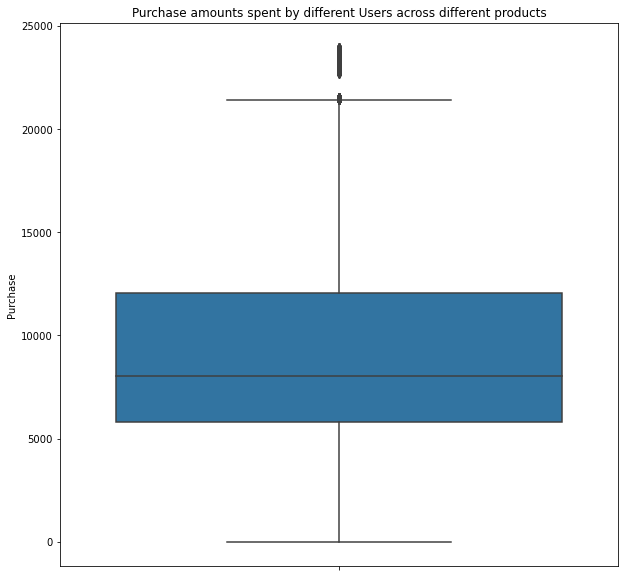

In [15]:
plt.figure(figsize = (10,10))
sns.boxplot(y = data["Purchase"])
plt.title("Purchase amounts spent by different Users across different products")
plt.show()
# All the outliers are above the upper whishker. Hence in this case outliers represent that user
# has spent large amount on a particular product id) 

In [16]:
# Trying to underatsnd total no. of products across different product categories
prod_count_cat = data[["Product_Category", "Product_ID"]].drop_duplicates().groupby(["Product_Category"]).aggregate(product_count = ("Product_ID", "count")).reset_index()
prod_count_cat.sort_values("product_count", ascending = False)
# The maximum no. of unique products are present in Product Category 8 (1047 products available),
# followed by Categories 5,1,11, 2 with 967, 493, 254, 152 unique products in the given categories
# respectively.

,Product_Category,product_count
18,8,1047
15,5,967
0,1,493
2,11,254
11,2,152
16,6,119
17,7,102
7,16,98
13,3,90
14,4,88


In [17]:
prod_count_cat["product_count"].sum() == len(data["Product_ID"].unique())
# Therefore a product id is not present in different Product Category groups

True

In [18]:
prod_cat_pur = data.groupby(["Product_Category"]).aggregate(prod_cat_purchase = ("Purchase", "sum")).\
sort_values("prod_cat_purchase", ascending = False).reset_index()
prod_cat_pur["%age purchase"] = prod_cat_pur["prod_cat_purchase"]*100/prod_cat_pur["prod_cat_purchase"].sum()
prod_cat_pur
# As can be seen from the following dataframe, product category 1 contributes to 37.48% of total purchases made from walmart, 
# followed by categories 5 (18.48%), 8 (16.76%) and 6 (6.36%)
# Out of the 20 Product Categories, only 10 product categories (1,5,8,6,2,3,16,11,10,15,7) contribute more than 1 percent in 
# total purchases.

,Product_Category,prod_cat_purchase,%age purchase
0,1,1910013754,37.482024
1,5,941835229,18.482532
2,8,854318799,16.765114
3,6,324150302,6.361111
4,2,268516186,5.269350
5,3,204084713,4.004949
6,16,145120612,2.847840
7,11,113791115,2.233032
8,10,100837301,1.978827
9,15,92969042,1.824420


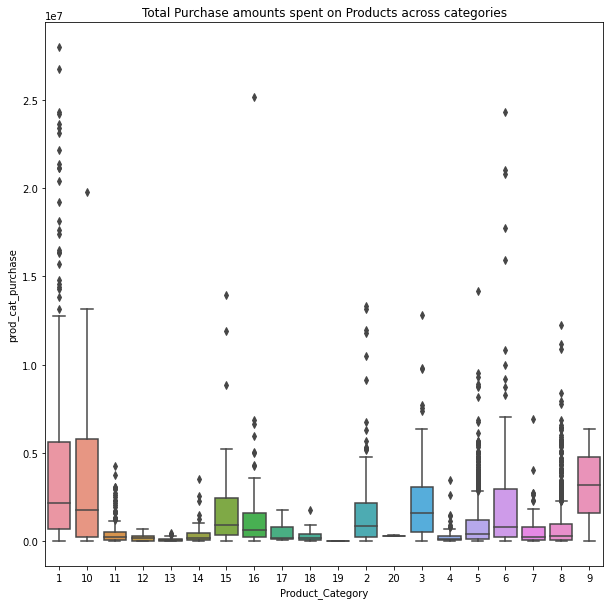

In [19]:
prod_cat_id_pur = data.groupby(["Product_Category", "Product_ID"]).aggregate(prod_cat_purchase = ("Purchase", "sum")).\
sort_values(["Product_Category", "prod_cat_purchase"], ascending = [True,False]).reset_index()
plt.figure(figsize = (10,10))
sns.boxplot(x = prod_cat_id_pur["Product_Category"], y = prod_cat_id_pur["prod_cat_purchase"])
plt.title("Total Purchase amounts spent on Products across categories")
plt.show()

# There are a number of products in product categories which are having purchases more than the other products in the group.

In [20]:
# Finding the list of products in each product category which are selling more than other products in the same category. 
# Such products can be considered as outliers in the above boxplot for Product Category Vs Product Catgory Purchase
# for each product category.
prod_category = []
prod_id = []
for i in prod_cat_id_pur["Product_Category"].unique():    
    z = prod_cat_id_pur.loc[prod_cat_id_pur["Product_Category"] == i, ::]
    prod_category.append(i)
    per25, per75 = np.percentile(z["prod_cat_purchase"], [25,75])
    IQR = per75-per25
    prod_id.append(z.loc[(z["prod_cat_purchase"] > (per75 + 1.5*IQR)) | (z["prod_cat_purchase"] < (per25-1.5*IQR)),\
                         "Product_ID"].tolist())
oversell_prod_category = pd.DataFrame([prod_category, prod_id]).T.rename(columns = {0:"Product_Category",\
                                                                                    1: "Better performing products"})
oversell_prod_category["Better performing products count"] = pd.Series(map(lambda x: len(x),\
                       oversell_prod_category["Better performing products"]))
oversell_prod_category = pd.merge(oversell_prod_category,prod_count_cat, on = "Product_Category")
for i in oversell_prod_category["Product_Category"].unique():
    a = oversell_prod_category.loc[oversell_prod_category["Product_Category"] == i, "Better performing products count"].\
    values[0]
    b = oversell_prod_category.loc[oversell_prod_category["Product_Category"] == i, "product_count"].values[0]
    print(f"In product category {i}, {a} are performing very well out of {b} products in the category")
oversell_prod_category

In product category 1, 26 are performing very well out of 493 products in the category
In product category 10, 1 are performing very well out of 25 products in the category
In product category 11, 25 are performing very well out of 254 products in the category
In product category 12, 0 are performing very well out of 25 products in the category
In product category 13, 4 are performing very well out of 35 products in the category
In product category 14, 5 are performing very well out of 44 products in the category
In product category 15, 3 are performing very well out of 44 products in the category
In product category 16, 8 are performing very well out of 98 products in the category
In product category 17, 0 are performing very well out of 11 products in the category
In product category 18, 1 are performing very well out of 30 products in the category
In product category 19, 0 are performing very well out of 2 products in the category
In product category 2, 13 are performing very well o

,Product_Category,Better performing products,Better performing products count,product_count
0,1,"[P00025442, P00110742, P00184942, P00112142, P...",26,493
1,10,[P00052842],1,25
2,11,"[P00113042, P00116742, P00250642, P00226342, P...",25,254
3,12,[],0,25
4,13,"[P00084442, P00084342, P00173042, P00149342]",4,35
5,14,"[P00086842, P00165842, P00214842, P00087242, P...",5,44
6,15,"[P00071442, P00111742, P00111042]",3,44
7,16,"[P00255842, P00288642, P00115842, P00124642, P...",8,98
8,17,[],0,11
9,18,[P00117542],1,30


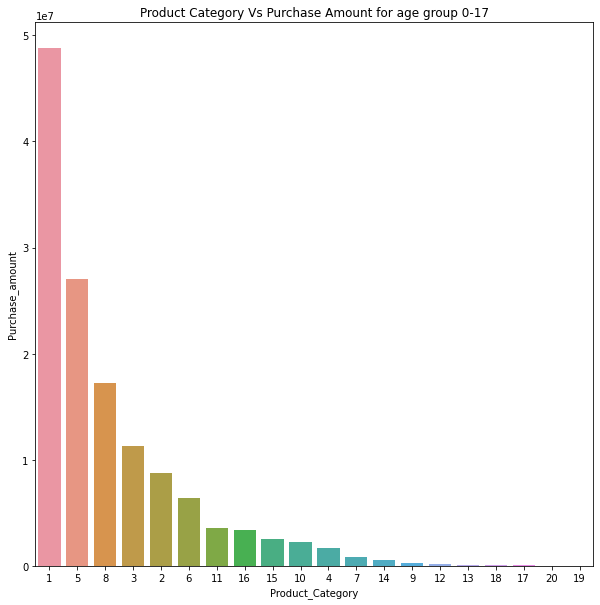

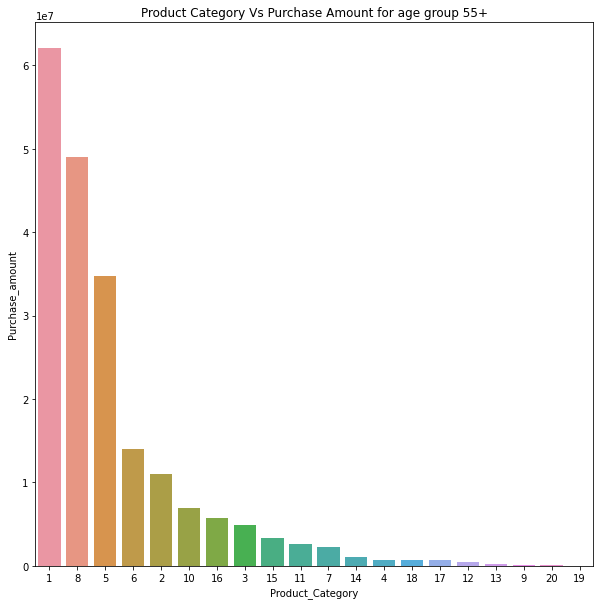

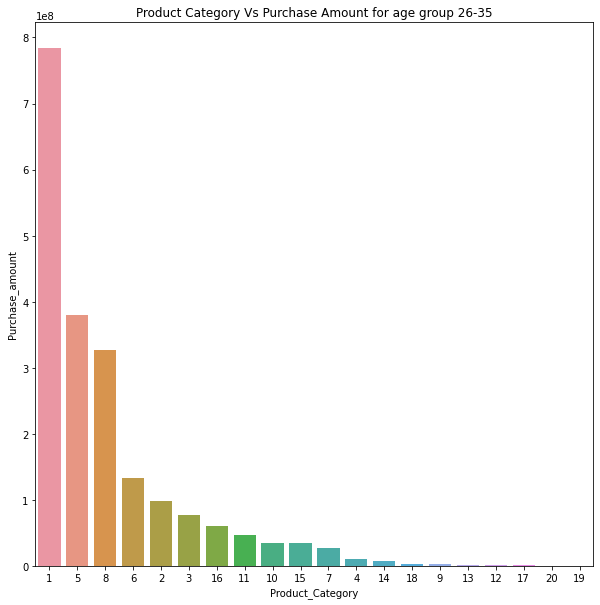

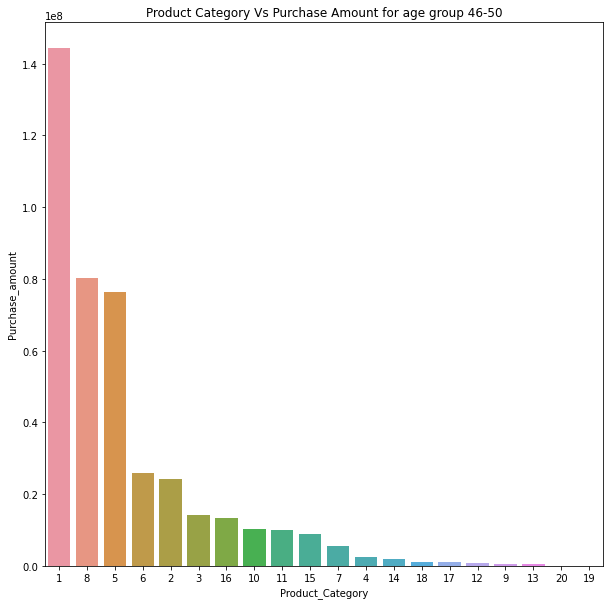

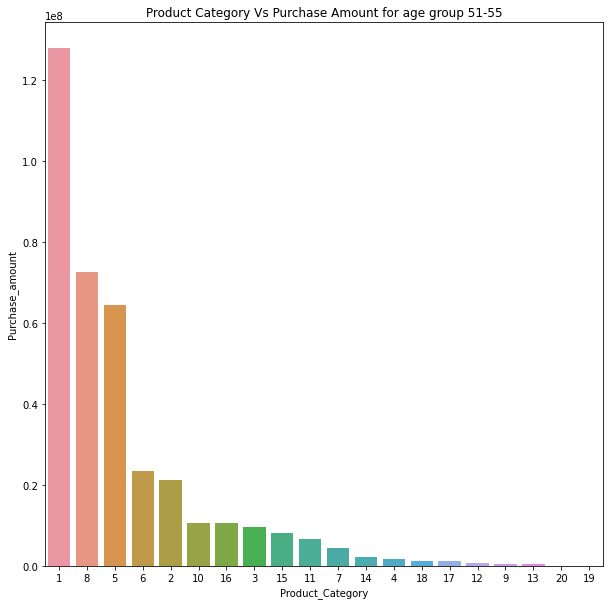

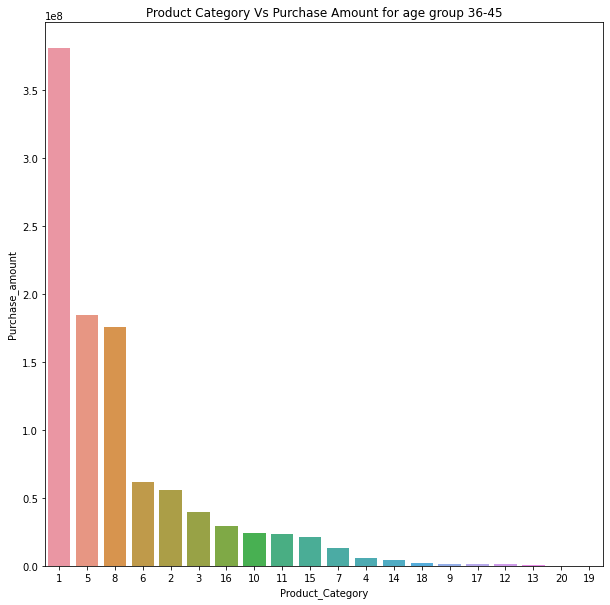

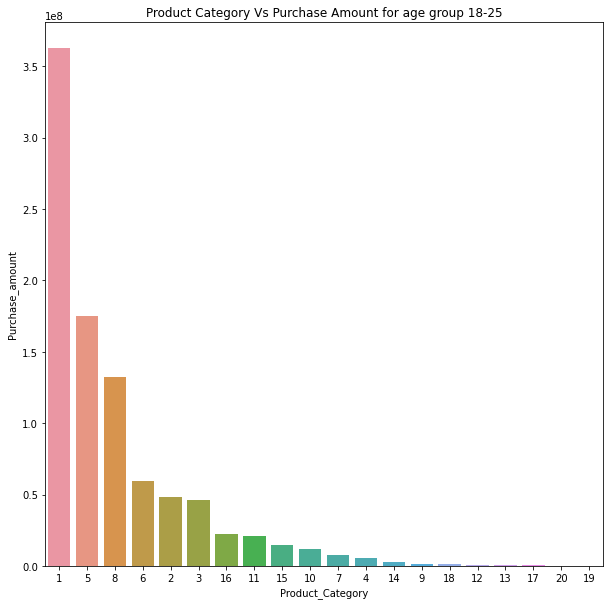

In [21]:
age_group = []
product_category_order = []

for i in data["Age"].unique():    
    z = data.loc[data["Age"] == i,::].groupby(["Age", "Product_Category"]).aggregate(Purchase_amount = ("Purchase", "sum"))\
    .reset_index().sort_values("Purchase_amount", ascending = False)
    plt.figure(figsize = (10,10))
    sns.barplot(x = z["Product_Category"] , y= z["Purchase_amount"])
    plt.title(f"Product Category Vs Purchase Amount for age group {i}")
    plt.show() 
    age_group.append(i)
    product_category_order.append(z["Product_Category"].values)

In [22]:
pd.DataFrame([age_group, product_category_order]).T.rename(columns = {0: "Age_Group", 1 : "Product_Category_Order"})
# As can be seen in the above dataframe, product category 1,5,8 are the top 3 product categories for all age groups.
# Product Category 3 is the 4th best selling category in age group 0-17 whereas for the other age groups product category 6
# is the best selling Product Category.
# Product Category 2 is the 5th best selling product category in all age groups.
# Product Category 16 is the 7th best selling product category in all age groups except 0-17 where 11 is 7 best selling category.
# Thus based on the above observation, it can be concluded that best selling Product Categories are common across all age groups.

,Age_Group,Product_Category_Order
0,0-17,"[1, 5, 8, 3, 2, 6, 11, 16, 15, 10, 4, 7, 14, 9..."
1,55+,"[1, 8, 5, 6, 2, 10, 16, 3, 15, 11, 7, 14, 4, 1..."
2,26-35,"[1, 5, 8, 6, 2, 3, 16, 11, 10, 15, 7, 4, 14, 1..."
3,46-50,"[1, 8, 5, 6, 2, 3, 16, 10, 11, 15, 7, 4, 14, 1..."
4,51-55,"[1, 8, 5, 6, 2, 10, 16, 3, 15, 11, 7, 14, 4, 1..."
5,36-45,"[1, 5, 8, 6, 2, 3, 16, 10, 11, 15, 7, 4, 14, 1..."
6,18-25,"[1, 5, 8, 6, 2, 3, 16, 11, 15, 10, 7, 4, 14, 9..."


In [23]:
# Identifying products which are in top 100 in order of decreasing purchase amount for all age groups
age_prod_pur = data.groupby(["Age", "Product_ID"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index().sort_values(["Age",\
"Purchase_amt"], ascending = [False, False])
prod_id = []
for i in age_prod_pur["Age"].unique():
    prod_id.append(age_prod_pur.loc[age_prod_pur["Age"] == i,"Product_ID"][0:100].values) 
A = set(prod_id[0])
for i in prod_id[1:]:
    A = A.intersection(set(i))    
A, len(A)
# Out of the top 100 selling products in order of Decreasing Purchase amount, the following 38 products are common in all age 
# groups

({'P00005042',
  'P00010742',
  'P00025442',
  'P00028842',
  'P00031042',
  'P00044442',
  'P00046742',
  'P00051442',
  'P00052842',
  'P00057642',
  'P00059442',
  'P00071442',
  'P00073842',
  'P00080342',
  'P00085942',
  'P00105142',
  'P00110742',
  'P00110842',
  'P00110942',
  'P00111142',
  'P00112142',
  'P00112442',
  'P00112542',
  'P00114942',
  'P00117942',
  'P00120042',
  'P00128942',
  'P00145042',
  'P00148642',
  'P00184942',
  'P00220442',
  'P00237542',
  'P00242742',
  'P00255842',
  'P00265242',
  'P00277642',
  'P00295942',
  'P00334242'},
 38)

Text(0.5, 1.0, 'Total Customers count of different Products')

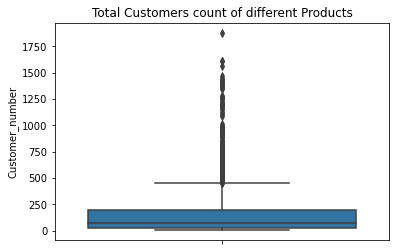

In [24]:
# Finding the products which are purchased by maximum customers.
prod_cust_cnt = data.groupby(["Product_ID"]).aggregate(Customer_number = ("User_ID", "count")).reset_index().\
sort_values("Customer_number", ascending = False)
sns.boxplot(y = prod_cust_cnt["Customer_number"])
plt.title("Total Customers count of different Products")

In [25]:
# Products which are purchased by maximum customer (product id's where customer count can be considered as an outlier)
per25, per75 = np.percentile(prod_cust_cnt["Customer_number"], [25,75])
prod_cust_cnt.loc[(prod_cust_cnt["Customer_number"] > (per75 + (per75-per25)*1.5)) | (prod_cust_cnt["Customer_number"] < \
(per25 - (per75-per25)*1.5)), "Product_ID"].values
# The top 5 products which have highest customer base are 'P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00057642'.

array(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00057642',
       'P00184942', 'P00046742', 'P00058042', 'P00145042', 'P00059442',
       'P00237542', 'P00255842', 'P00117942', 'P00110942', 'P00010742',
       'P00220442', 'P00110842', 'P00117442', 'P00051442', 'P00102642',
       'P00278642', 'P00242742', 'P00034742', 'P00148642', 'P00080342',
       'P00031042', 'P00028842', 'P00251242', 'P00114942', 'P00270942',
       'P00000142', 'P00112542', 'P00044442', 'P00334242', 'P00111142',
       'P00277642', 'P00052842', 'P00116842', 'P00295942', 'P00005042',
       'P00003442', 'P00086442', 'P00258742', 'P00085942', 'P00110542',
       'P00216342', 'P00073842', 'P00128942', 'P00113242', 'P00112442',
       'P00105142', 'P0097242', 'P00147942', 'P00182142', 'P00106042',
       'P00120042', 'P00085242', 'P00371644', 'P00036842', 'P00121642',
       'P00289942', 'P00062842', 'P00003242', 'P00157542', 'P00372445',
       'P00259342', 'P00178942', 'P00156442', 'P00057742', 'P0037

In [26]:
df1 = data.groupby(["Product_Category", "Product_ID"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index()
df2 = data[["Product_ID", "User_ID"]].drop_duplicates().groupby(["Product_ID"]).aggregate(Customer_count = ("User_ID", "count")).\
reset_index()
df3 = pd.merge(df1, df2, on = "Product_ID")
df3["% Purchase"] = round(df3["Purchase_amt"]/df3["Purchase_amt"].sum(),4)
df3.sort_values(["Product_Category", "Customer_count", "% Purchase"], ascending = [True, True, True], inplace = True)
df3

,Product_Category,Product_ID,Purchase_amt,Customer_count,% Purchase
15,1,P00013542,15836,1,0.0000
32,1,P00027842,12128,1,0.0000
86,1,P00057842,4179,1,0.0000
90,1,P00060842,15737,1,0.0000
155,1,P00126742,15636,1,0.0000
...,...,...,...,...,...
2696,8,P00031042,10863768,1200,0.0021
2758,8,P00051442,11186280,1249,0.0022
2776,8,P00058042,12250634,1422,0.0024
3629,9,P00075042,18456,1,0.0000


In [27]:
df3["% Purchase"].describe()

count    3631.000000
mean        0.000271
std         0.000522
min         0.000000
25%         0.000000
50%         0.000100
75%         0.000300
max         0.005500
Name: % Purchase, dtype: float64

In [28]:
df3["Customer_count"].describe()

count    3631.000000
mean      151.492151
std       212.852932
min         1.000000
25%        19.500000
50%        71.000000
75%       194.000000
max      1880.000000
Name: Customer_count, dtype: float64

In [29]:
# Products where high discount needs to br provided where there are low customer counts and also low purchase.
df3.loc[(df3["Customer_count"] < np.quantile(df3["Customer_count"],0.25)) & \
        (df3["% Purchase"] <= np.quantile(df3["% Purchase"],0.25))]

,Product_Category,Product_ID,Purchase_amt,Customer_count,% Purchase
15,1,P00013542,15836,1,0.0
32,1,P00027842,12128,1,0.0
86,1,P00057842,4179,1,0.0
90,1,P00060842,15737,1,0.0
155,1,P00126742,15636,1,0.0
...,...,...,...,...,...
3193,8,P00215342,132298,19,0.0
3250,8,P00239342,127957,19,0.0
3458,8,P00310642,90395,19,0.0
3559,8,P00349542,144662,19,0.0


In [30]:
age_purchase_cont = data.groupby(["Age"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index()
age_purchase_cont["%age contribution"] = round(age_purchase_cont["Purchase_amt"]*100/age_purchase_cont["Purchase_amt"].sum(),2)
age_purchase_cont
# As can be seen from the dataframe below:
# Maximum Purchase on Black Friday were made by users of Age group 26-35 (39.87%), followed by 36-45 (20.15%), 18-25 (17.93%)

,Age,Purchase_amt,%age contribution
0,0-17,134913183,2.65
1,18-25,913848675,17.93
2,26-35,2031770578,39.87
3,36-45,1026569884,20.15
4,46-50,420843403,8.26
5,51-55,367099644,7.20
6,55+,200767375,3.94


In [31]:
age_prodc_pur = data.groupby(["Age", "Product_Category"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index().sort_values(["Age", \
"Purchase_amt"], ascending = [False, False])
age_prodc_pur["per_contribution"] = age_prodc_pur["Purchase_amt"]*100/age_prodc_pur["Purchase_amt"].sum()
age_prodc_pur.sort_values("per_contribution", ascending = False, inplace = True)
age_prodc_pur.reset_index(drop = True, inplace = True)
age_prodc_pur
# The maximum contribution to Purchase comes from age group 26-35, Product category 1 (15.38% of total purchase) followed by
# age group 36-45, Product Category 1 with 7.46% and Age group 26-35, product category 5 with 7.45%.

,Age,Product_Category,Purchase_amt,per_contribution
0,26-35,1,783813459,15.381520
1,36-45,1,380631904,7.469503
2,26-35,5,379702493,7.451265
3,18-25,1,362607972,7.115803
4,26-35,8,327523339,6.427303
...,...,...,...,...
135,18-25,19,9913,0.000195
136,46-50,19,5521,0.000108
137,51-55,19,5080,0.000100
138,55+,19,4006,0.000079


In [32]:
prod_cate_pur_amt_dist_age = pd.merge(age_prodc_pur[["Age","Product_Category", "Purchase_amt"]],age_prodc_pur.groupby("Age")\
[["Purchase_amt"]].sum().reset_index(), on = "Age").rename(columns = {"Purchase_amt_x": "Purchase amt age and prod cat wise",\
"Purchase_amt_y": "Purchase amt age wise"})
prod_cate_pur_amt_dist_age["%age of Product Category purchase in age group"] = \
round(prod_cate_pur_amt_dist_age["Purchase amt age and prod cat wise"]*100/prod_cate_pur_amt_dist_age["Purchase amt age wise"],2)
prod_cate_pur_amt_dist_age.sort_values(["Age","%age of Product Category purchase in age group"], ascending = [False, False])

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group
100,55+,1,62041252,200767375,30.90
101,55+,8,48995349,200767375,24.40
102,55+,5,34690406,200767375,17.28
103,55+,6,13980457,200767375,6.96
104,55+,2,11023487,200767375,5.49
...,...,...,...,...,...
135,0-17,13,82573,134913183,0.06
136,0-17,18,74703,134913183,0.06
137,0-17,17,60863,134913183,0.05
138,0-17,20,33121,134913183,0.02


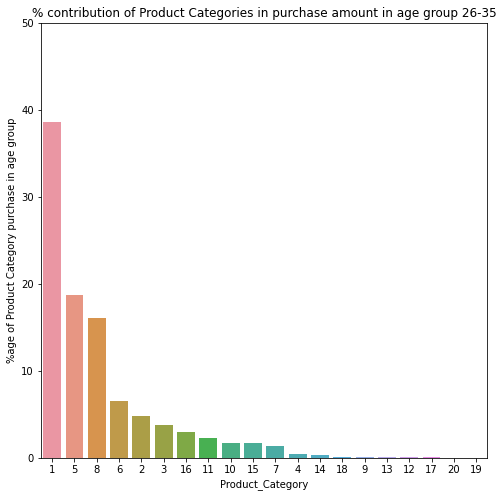

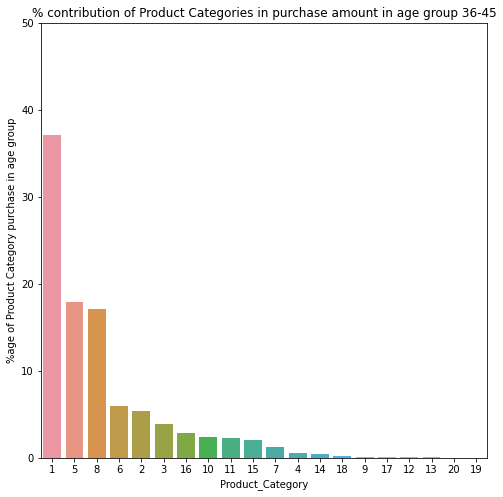

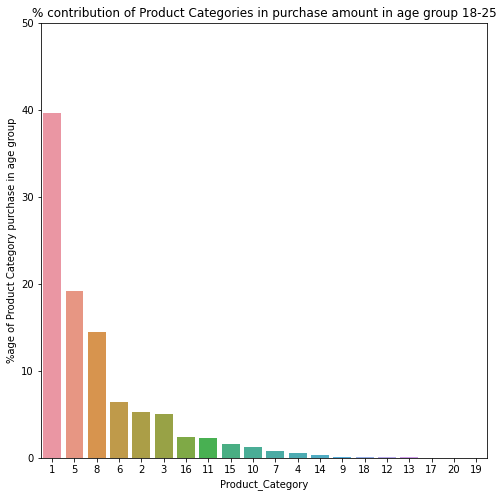

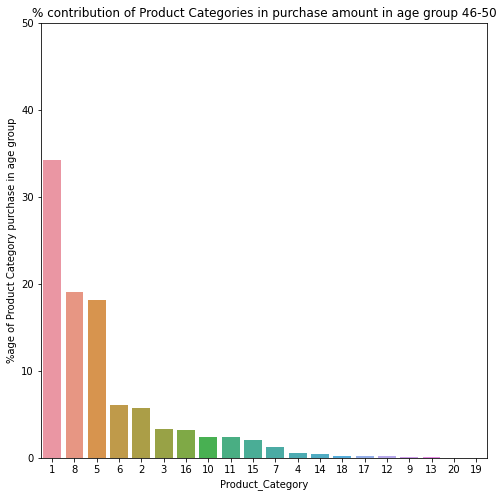

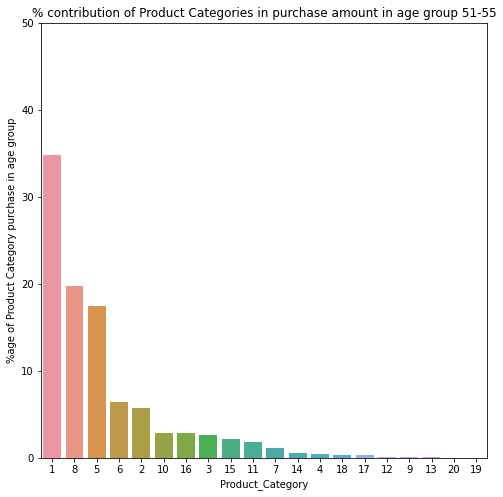

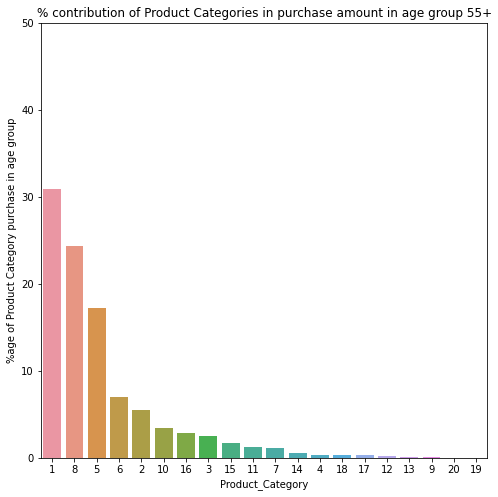

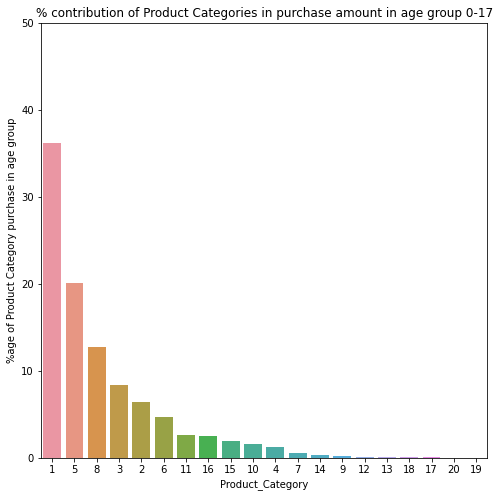

In [33]:
for i in prod_cate_pur_amt_dist_age["Age"].unique():
    plt.figure(figsize = (8,8))
    z = prod_cate_pur_amt_dist_age.loc[prod_cate_pur_amt_dist_age["Age"]==i, ::]
    ax = sns.barplot(x = z["Product_Category"], y = z["%age of Product Category purchase in age group"])
    plt.ylim(0,50)
    #plt.bar_label(ax.containers[0])
    plt.title(f"% contribution of Product Categories in purchase amount in age group {i}")
    plt.show()
# Observation: 


In [34]:
# Average purchase made by a customer for a given age and Product Category
age_cat_cust_avg_pur = data.groupby(["Age", "Product_Category"]).aggregate(Purchase_amt = ("Purchase", "sum"), Customer_count = ("User_ID", "count"))\
.reset_index().sort_values(["Age"], ascending = True)
age_cat_cust_avg_pur["Avg Purchase by customer"] = round(age_cat_cust_avg_pur["Purchase_amt"]/age_cat_cust_avg_pur\
["Customer_count"],2)
age_cat_cust_avg_pur

,Age,Product_Category,Purchase_amt,Customer_count,Avg Purchase by customer
0,0-17,1,48783247,3585,13607.60
19,0-17,9,246958,16,15434.88
18,0-17,8,17234789,2258,7632.77
17,0-17,7,821014,53,15490.83
16,0-17,6,6377154,399,15982.84
...,...,...,...,...,...
121,55+,10,6939900,350,19828.29
120,55+,1,62041252,4411,14065.12
138,55+,8,48995349,6208,7892.29
128,55+,17,710254,67,10600.81


In [35]:
age_cat_cust_avg_pur = pd.merge(age_cat_cust_avg_pur, pd.DataFrame(data.groupby("Age").aggregate(Customer_count_age = \
("User_ID", "count"))).reset_index(), on = "Age")

In [36]:
prod_cate_pur_amt_dist_age = pd.merge(prod_cate_pur_amt_dist_age, age_cat_cust_avg_pur[["Age", "Product_Category",\
"Customer_count","Customer_count_age", "Avg Purchase by customer"]],on = ["Age", "Product_Category"])
prod_cate_pur_amt_dist_age["%age customer in age_group"] = prod_cate_pur_amt_dist_age["Customer_count"]*100/\
prod_cate_pur_amt_dist_age["Customer_count_age"]

In [37]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '1'].sort_values(["Product_Category", "Age"])
# In age group 18-25, product category 1 contributes maximum of 39.68% of total purchase amount in the group.
# In age group 55+, product category 1 contributes minimum of 30.90% of total purchase amount in the group.
# The contribution of Product_Category 1 in different age groups is between 30.90 to 39.68%.
# The contribution of Product Category 1 in Purchase amount increase till age group 18-25 and then starts decreasing.
# The avergae purchase by customer in Product Category 1 varies between 13448 to 14125 across different age groups.
# It decreases by a 200 units from age group 0-17 till age 26-35, then increases with increase in age.
# Even though the Avergae Purchase mae by a customer increase from age 18-25 as age increases, the precentag of total amount
# spent by the group decreases. This implies there are other Product categories where purchase increases with increase in age.
# Out of 219587 people in the age group 26-35, 58249 purchased product category 1 products. 
# The percentage of people who purchase in Product Category 1 increases till age group 18-25 and then decreases with increase
# in age. The Product Category 1 has maximum craze in age group 18-25, where 27 percent of users purchase a product from the 
# categroy.
# If a company is targetting a discount campaign, they should target those products in Category 1 which have been
# purchased by customers belonging between age group 18-25, 26-35 and 36-45 as they are in the top 3 having highest customer
# count.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
120,0-17,1,48783247,134913183,36.16,3585,15102,13607.60,23.738578
40,18-25,1,362607972,913848675,39.68,26962,99660,13448.85,27.053984
0,26-35,1,783813459,2031770578,38.58,58249,219587,13456.26,26.526616
20,36-45,1,380631904,1026569884,37.08,27648,110013,13767.07,25.131575
60,46-50,1,144311800,420843403,34.29,10474,45701,13778.10,22.918536
80,51-55,1,127824120,367099644,34.82,9049,38501,14125.77,23.503286
100,55+,1,62041252,200767375,30.90,4411,21504,14065.12,20.512463


In [38]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '2'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 2 contributes maximum of 6.48% of total purchase amount in the group.
# In age group 26-35, product category 2 contributes minimum of 4.87% of total purchase amount in the group.
# The contribution of Product_Category 2 in different age groups is between 4.5 to 6.5%.
# The average purchase made by a customer in Product Category 2 also increases with age and is between 10851 and 12180.
# The maximum perentage in any age group that a person buys a product is 5.33% for 0-17 age group.
# The percentage of users in a age group who purchases some product from Category 2 lies between 4.06 to 5.33% of the customers
# in that group.
# If a company is targetting a discount campaign, they should target those products in Category 1 which have been
# purchased by customers belonging between age group 18-25, 26-35 and 36-45 as they are in the top 3 having highest customer
# count.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
124,0-17,2,8735846,134913183,6.48,805,15102,10851.98,5.330420
44,18-25,2,48560733,913848675,5.31,4428,99660,10966.74,4.443107
4,26-35,2,98957188,2031770578,4.87,8928,219587,11083.91,4.065814
24,36-45,2,55878648,1026569884,5.44,4912,110013,11375.95,4.464927
64,46-50,2,24163446,420843403,5.74,2105,45701,11479.07,4.606026
84,51-55,2,21196838,367099644,5.77,1781,38501,11901.65,4.625854
104,55+,2,11023487,200767375,5.49,905,21504,12180.65,4.208519


In [39]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '3'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 3 contributes maximum of 8.39% of total purchase amount in the group.
# In age group 55+, product category 3 contributes minimum of 2.47% of total purchase amount in the group.
# The contribution of Product_Category 3 in different age groups is between 2.47 to 8.39%.
# Another intereseting observation is as the age group inceases towards older age, the contribution of Product Category 3 in 
# total purchase amount decreases.
# The average purchase made in Product Category 3 also increases with increase in age and lies between 9431 and 10340.
# 7.94% of customers in Age group 0-17 purchase Product Category 3, where as only 2.26% in age group 55+ purchase in Product 
# Category 3. 
# Even though 4.72% or less purchase Product Category 3 products in age group 18-25, 26-35 and 36-45, the number of purchasers
# is very high and is 4710, 7662 and 3854 respectively. Also, the average purchase amount by a consumer is also comparable to 
# other groups. Hence, if Walmart is trying to launch discount campaigns, it can do it in these age groups to attract more
# customers as compared to other groups.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
123,0-17,3,11317806,134913183,8.39,1200,15102,9431.50,7.945967
45,18-25,3,46495837,913848675,5.09,4710,99660,9871.73,4.726069
5,26-35,3,77805963,2031770578,3.83,7662,219587,10154.79,3.489278
25,36-45,3,39851494,1026569884,3.88,3854,110013,10340.29,3.503222
65,46-50,3,14120037,420843403,3.36,1376,45701,10261.65,3.010875
87,51-55,3,9542540,367099644,2.60,924,38501,10327.42,2.399938
107,55+,3,4951036,200767375,2.47,487,21504,10166.40,2.264695


In [40]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '4'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 3 contributes maximum of 1.26% of total purchase amount in the group.
# In age group 55+, product category 3 contributes minimum of 0.38% of total purchase amount in the group.
# The %age contribution of Product Category 4 in purchase amount of different age groups except 0-17 lie between 0.38 to 0.6%.
# The average purchase made by a customer also varies between 2194 and 2445 in product category 4 and increases with increase in 
# age.
# While 5.02% of customers in age group 0-17 purchase a product from Product Category 4, only 1.48% of customers in age group 55+
# purchase a product from same category.
# The company can launch a discount campaign on products mostly bought in the age group 18-25, 26-35 and 36-45 because of large
# no. of customers in this product category. The average purchase amount in this category for these age groups is comparable to 
# other groups.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
130,0-17,4,1701452,134913183,1.26,758,15102,2244.66,5.019203
51,18-25,4,5404706,913848675,0.59,2463,99660,2194.36,2.471403
11,26-35,4,9810046,2031770578,0.48,4192,219587,2340.18,1.909038
31,36-45,4,5650797,1026569884,0.55,2354,110013,2400.51,2.139747
71,46-50,4,2395813,420843403,0.57,990,45701,2420.01,2.166255
92,51-55,4,1658375,367099644,0.45,678,38501,2445.98,1.760993
112,55+,4,759299,200767375,0.38,318,21504,2387.73,1.478795


In [41]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '5'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 5 contributes maximum of 20.06% of total purchase amount in the group.
# In age group 55+, product category 5 contributes minimum of 17.28% of total purchase amount in the group.
# Across all age groups, Product Category 5 contributes between 17.28% to 20.06%.
# The average purchase by a customer in category 5 decrease till 18-25 and then increases with increase in age. 
# For customers in age 55+, there is a dip in average price.
# 28.67% of users in group 0-17, 24.95% in group 55+, purchase a product from category 5. 
# The company can launch a discount campaign on products mostly bought in the age group 18-25, 26-35 and 36-45 because of large
# no. of customers in this product category. The average purchase amount in this category for these age groups is comparable to 
# other groups.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
121,0-17,5,27059712,134913183,20.06,4330,15102,6249.36,28.671699
41,18-25,5,175198782,913848675,19.17,28522,99660,6142.58,28.619306
1,26-35,5,379702493,2031770578,18.69,61473,219587,6176.74,27.994827
21,36-45,5,184577971,1026569884,17.98,29377,110013,6283.08,26.703208
62,46-50,5,76279651,420843403,18.13,11971,45701,6372.04,26.194175
82,51-55,5,64326214,367099644,17.52,9893,38501,6502.19,25.695436
102,55+,5,34690406,200767375,17.28,5367,21504,6463.65,24.958147


In [42]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '6'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 6 contributes minimum of 4.73% of total purchase amount in the group.
# In age group 55+, product category 6 contributes minimum of 6.47% of total purchase amount in the group.
# Across all age groups, Product Category 6 contributes between 4.73% to 6.96%.
# 4.01% of users in age group 55+ and 2.64% of users in 0-17 group purchase a product from category 6. 
# The company can launch a discount campaign on products mostly bought in the age group 18-25, 26-35 and 36-45 because of large
# no. of customers in this product category. The average purchase amount in this category for these age groups is comparable to 
# other groups.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
125,0-17,6,6377154,134913183,4.73,399,15102,15982.84,2.642034
43,18-25,6,59116571,913848675,6.47,3749,99660,15768.62,3.761790
3,26-35,6,133712687,2031770578,6.58,8485,219587,15758.71,3.864072
23,36-45,6,61617298,1026569884,6.00,3899,110013,15803.36,3.544127
63,46-50,6,25816828,420843403,6.13,1622,45701,15916.66,3.549156
83,51-55,6,23529307,367099644,6.41,1450,38501,16227.11,3.766136
103,55+,6,13980457,200767375,6.96,862,21504,16218.63,4.008557


In [43]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '7'].sort_values(["Product_Category", "Age"])
# In age group 26-35, product category 7 contributes maximum of 1.33% of total purchase amount in the group.
# In age group 0-17, product category 7 contributes minimum of 0.61% of total purchase amount in the group.
# Across all age groups, Product Category 7 contributes between 0.61% to 1.13%.
# The percentage contribution of Product Category 7 increases till age group 36-45 and then decreases again as the age increases.
# 0.75% of users in age group 26-35 and 0.35% of users in 0-17 group purchase a product from category 7. 
# The company can launch a discount campaign on products mostly bought in the age group 18-25, 26-35, 36-45 and 46-50 because of large
# no. of customers in this product category. The average purchase amount in this category for these age groups is comparable to 
# other groups.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
131,0-17,7,821014,134913183,0.61,53,15102,15490.83,0.350947
50,18-25,7,7726231,913848675,0.85,481,99660,16062.85,0.482641
10,26-35,7,26979330,2031770578,1.33,1651,219587,16341.21,0.751866
30,36-45,7,13308854,1026569884,1.30,809,110013,16450.99,0.735368
70,46-50,7,5434726,420843403,1.29,327,45701,16619.96,0.715520
90,51-55,7,4356259,367099644,1.19,266,38501,16376.91,0.690891
110,55+,7,2270317,200767375,1.13,134,21504,16942.66,0.623140


In [44]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '8'].sort_values(["Product_Category", "Age"])
# In age group 55+, product category 8 contributes maximum of 24.40% of total purchase amount in the group.
# In age group 0-17, product category 8 contributes minimum of 12.77% of total purchase amount in the group.
# Across all age groups, Product Category 8 contributes between 12.77% to 24.40%.
# The percentage contribution of Product Category 8 increases as the age increases.
# As the age increases above 55, the Product Category contributes 24.4% (almost 25%) of the total purchase amount.
# 28.8% of customers in age group 55+ and 14.95% of customers in age group 0-17 purchased product from category 8.
# The average purchase made by a customer in the product category is minimum 7387.64 in 18-25 and maximum 7892.29 age group 55+.
# The company can launch a discount campaign on products mostly bought in the age group 18-25, 26-35, 36-45 and 46-50 because of large
# no. of customers in this product category. 
# If there are some products which are specifically purchased by Age group 55+, then special discounts can be given on those products
# to encourage more purchase among that group.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
122,0-17,8,17234789,134913183,12.77,2258,15102,7632.77,14.951662
42,18-25,8,132320061,913848675,14.48,17911,99660,7387.64,17.972105
2,26-35,8,327523339,2031770578,16.12,44256,219587,7400.65,20.154199
22,36-45,8,175386080,1026569884,17.08,23296,110013,7528.59,21.175679
61,46-50,8,80267806,420843403,19.07,10656,45701,7532.64,23.316776
81,51-55,8,72591375,367099644,19.77,9340,38501,7772.10,24.259110
101,55+,8,48995349,200767375,24.40,6208,21504,7892.29,28.869048


In [45]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '9'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 9 contributes maximum of 0.18% of total purchase amount in the group.
# In age group 55+, product category 9 contributes minimum of 0.07% of total purchase amount in the group.
# Across all age groups, Product Category 9 contributes between 0.18% to 0.07%.
# 0.11% of customers in age group 0-17 whereas 0.03% of users in age group 55+ purchase in product category 9.
# The average purchase made by a customer in the product category is minimum 14576 in 51-55 and maximum 18626.38 age group 55+.
# The company can launch a discount campaign on products mostly bought in the age group 18-25, 26-35, 36-45 because of large
# no. of customers in this product category. 

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
133,0-17,9,246958,134913183,0.18,16,15102,15434.88,0.105946
53,18-25,9,1079042,913848675,0.12,63,99660,17127.65,0.063215
14,26-35,9,2413758,2031770578,0.12,154,219587,15673.75,0.070132
34,36-45,9,1571771,1026569884,0.15,107,110013,14689.45,0.097261
76,46-50,9,487060,420843403,0.12,33,45701,14759.39,0.072208
96,51-55,9,422724,367099644,0.12,29,38501,14576.69,0.075323
117,55+,9,149011,200767375,0.07,8,21504,18626.38,0.037202


In [46]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '10'].sort_values(["Product_Category", "Age"])
# In age group 55+, product category 10 contributes maximum of 3.46% of total purchase amount in the group.
# In age group 18-25, product category 10 contributes minimum of 1.27% of total purchase amount in the group.
# Across all age groups, Product Category 10 contributes between 1.27% to 3.46%.
# As the age increases, Product Category 10 contribution decreases  till 18-25 and then increases in purchase amount across age
# groups. 

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
129,0-17,10,2224273,134913183,1.65,111,15102,20038.50,0.735002
49,18-25,10,11572908,913848675,1.27,603,99660,19192.22,0.605057
8,26-35,10,34954106,2031770578,1.72,1787,219587,19560.22,0.813800
27,36-45,10,24270193,1026569884,2.36,1235,110013,19651.98,1.122595
67,46-50,10,10220463,420843403,2.43,520,45701,19654.74,1.137831
85,51-55,10,10655458,367099644,2.90,519,38501,20530.75,1.348017
105,55+,10,6939900,200767375,3.46,350,21504,19828.29,1.627604


In [47]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '11'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 11 contributes maximum of 2.64% of total purchase amount in the group.
# In age group 55+, product category 11 contributes minimum of 1.30% of total purchase amount in the group.
# Across all age groups, Product Category 11 contributes between 1.30% to 2.64%.
# As the age increases, Product Category 11 contribution decreases generally.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
126,0-17,11,3558043,134913183,2.64,740,15102,4808.17,4.900013
47,18-25,11,21132943,913848675,2.31,4597,99660,4597.12,4.612683
7,26-35,11,46181222,2031770578,2.27,9874,219587,4677.05,4.496623
28,36-45,11,23589872,1026569884,2.30,4953,110013,4762.74,4.502195
68,46-50,11,9977768,420843403,2.37,2104,45701,4742.29,4.603838
89,51-55,11,6748072,367099644,1.84,1458,38501,4628.31,3.786915
109,55+,11,2603195,200767375,1.30,561,21504,4640.28,2.608817


In [48]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '12'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 12 contributes maximum of 0.13% of total purchase amount in the group.
# In age group 55+, product category 12 contributes minimum of 0.24% of total purchase amount in the group.
# Across all age groups, Product Category 12 contributes between 0.13% to 0.24%.
# As the age increases, Product Category 12 contribution decreases till 18-25 and then increases with increase in age.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
134,0-17,12,177964,134913183,0.13,125,15102,1423.71,0.827705
55,18-25,12,558864,913848675,0.06,439,99660,1273.04,0.440498
16,26-35,12,1449185,2031770578,0.07,1096,219587,1322.25,0.499119
36,36-45,12,1342165,1026569884,0.13,994,110013,1350.27,0.903530
75,46-50,12,719394,420843403,0.17,520,45701,1383.45,1.137831
95,51-55,12,597719,367099644,0.16,433,38501,1380.41,1.124646
115,55+,12,486553,200767375,0.24,340,21504,1431.04,1.581101


In [49]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '13'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 13 contributes maximum of 0.06% of total purchase amount in the group.
# In age group 55+, product category 13 contributes minimum of 0.11% of total purchase amount in the group.
# Across all age groups, Product Category 13 contributes between 0.06% to 0.11%.
# As the age increases, Product Category 13 contribution increases.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
135,0-17,13,82573,134913183,0.06,112,15102,737.26,0.741624
56,18-25,13,530639,913848675,0.06,756,99660,701.90,0.758579
15,26-35,13,1502297,2031770578,0.07,2096,219587,716.74,0.954519
37,36-45,13,899774,1026569884,0.09,1250,110013,719.82,1.136229
77,46-50,13,402618,420843403,0.10,551,45701,730.70,1.205663
97,51-55,13,368453,367099644,0.10,483,38501,762.84,1.254513
116,55+,13,222247,200767375,0.11,301,21504,738.36,1.399740


In [50]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '14'].sort_values(["Product_Category", "Age"])
# In age group 18-25, product category 14 contributes minimum of 0.32% of total purchase amount in the group.
# In age group 51-55, product category 14 contributes maximum of 0.59% of total purchase amount in the group.
# Across all age groups, Product Category 14 contributes between 0.32% to 0.59%.
# As the age increases, Product Category 14 contribution decreases till 18-25 and increases till 51-55. It again drops in the
# age 55+

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
132,0-17,14,512227,134913183,0.38,39,15102,13134.03,0.258244
52,18-25,14,2922039,913848675,0.32,230,99660,12704.52,0.230785
12,26-35,14,7208556,2031770578,0.35,564,219587,12781.13,0.256846
32,36-45,14,4219327,1026569884,0.41,312,110013,13523.48,0.283603
72,46-50,14,1954454,420843403,0.46,149,45701,13117.14,0.326032
91,51-55,14,2180826,367099644,0.59,154,38501,14161.21,0.399990
111,55+,14,1017267,200767375,0.51,75,21504,13563.56,0.348772


In [51]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '15'].sort_values(["Product_Category", "Age"])
# In age group 18-25, product category 15 contributes minimum of 1.61% of total purchase amount in the group.
# In age group 51-55, product category 15 contributes maximum of 2.22% of total purchase amount in the group.
# Across all age groups, Product Category 15 contributes between 1.61% to 2.22%.
# As the age increases, Product Category 15 contribution decreases till 18-25 and increases till 51-55. It again drops in the
# age 55+

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
128,0-17,15,2557534,134913183,1.90,160,15102,15984.59,1.059462
48,18-25,15,14702838,913848675,1.61,1024,99660,14358.24,1.027493
9,26-35,15,34455543,2031770578,1.70,2372,219587,14525.95,1.080210
29,36-45,15,20878773,1026569884,2.03,1395,110013,14966.86,1.268032
69,46-50,15,8855368,420843403,2.10,602,45701,14709.91,1.317258
88,51-55,15,8138987,367099644,2.22,508,38501,16021.63,1.319446
108,55+,15,3379999,200767375,1.68,229,21504,14759.82,1.064918


In [52]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '16'].sort_values(["Product_Category", "Age"])
# In age group 46.-50, product category 16 contributes maximum of 3.17% of total purchase amount in the group.
# In age group 18-25, product category 16 contributes maximum of 2.45% of total purchase amount in the group.
# Across all age groups, Product Category 16 contributes between 2.45% to 3.17%.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
127,0-17,16,3351633,134913183,2.48,229,15102,14635.95,1.516355
46,18-25,16,22361393,913848675,2.45,1598,99660,13993.36,1.603452
6,26-35,16,60527425,2031770578,2.98,4118,219587,14698.26,1.875339
26,36-45,16,29263813,1026569884,2.85,1955,110013,14968.70,1.777063
66,46-50,16,13348682,420843403,3.17,879,45701,15186.21,1.923371
86,51-55,16,10503288,367099644,2.86,672,38501,15629.89,1.745409
106,55+,16,5764378,200767375,2.87,377,21504,15290.13,1.753162


In [53]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '17'].sort_values(["Product_Category", "Age"])
# In age group 18-25, product category 17 contributes minimum of 0.04% of total purchase amount in the group.
# In age group 55+, product category 17 contributes maximum of 0.35% of total purchase amount in the group.
# Across all age groups, Product Category 17 contributes between 0.04% to 0.35%.
# As the age increases, Product Category 17 contribution decreases till 18-25 and increases with increase in age.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
137,0-17,17,60863,134913183,0.05,6,15102,10143.83,0.039730
57,18-25,17,388536,913848675,0.04,41,99660,9476.49,0.041140
17,26-35,17,1248285,2031770578,0.06,127,219587,9829.02,0.057836
35,36-45,17,1365016,1026569884,0.13,135,110013,10111.23,0.122713
74,46-50,17,978178,420843403,0.23,95,45701,10296.61,0.207873
94,51-55,17,1127567,367099644,0.31,107,38501,10538.01,0.277915
114,55+,17,710254,200767375,0.35,67,21504,10600.81,0.311570


In [54]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '18'].sort_values(["Product_Category", "Age"])
# In age group 0-17, product category 18 contributes minimum of 0.06% of total purchase amount in the group.
# In age group 55+, product category 18 contributes maximum of 0.36% of total purchase amount in the group.
# Across all age groups, Product Category 18 contributes between 0.06% to 0.36%.
# As the age increases, Product Category 18 contribution increases.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
136,0-17,18,74703,134913183,0.06,27,15102,2766.78,0.178784
54,18-25,18,986425,913848675,0.11,339,99660,2909.81,0.340157
13,26-35,18,3166855,2031770578,0.16,1042,219587,3039.21,0.474527
33,36-45,18,2070049,1026569884,0.20,702,110013,2948.79,0.638106
73,46-50,18,1016581,420843403,0.24,351,45701,2896.24,0.768036
93,51-55,18,1254082,367099644,0.34,423,38501,2964.73,1.098673
113,55+,18,721506,200767375,0.36,241,21504,2993.80,1.120722


In [55]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '19'].sort_values(["Product_Category", "Age"])
# Across all age groups, product category 19 contributes very little in Purchase amount for that group.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
139,0-17,19,2271,134913183,0.0,59,15102,38.49,0.390677
59,18-25,19,9913,913848675,0.0,275,99660,36.05,0.275938
19,26-35,19,20739,2031770578,0.0,563,219587,36.84,0.256390
39,36-45,19,11848,1026569884,0.0,320,110013,37.02,0.290875
79,46-50,19,5521,420843403,0.0,149,45701,37.05,0.326032
99,51-55,19,5080,367099644,0.0,134,38501,37.91,0.348043
119,55+,19,4006,200767375,0.0,103,21504,38.89,0.478981


In [56]:
prod_cate_pur_amt_dist_age[prod_cate_pur_amt_dist_age["Product_Category"] == '20'].sort_values(["Product_Category", "Age"])
# Across all age groups, product category contributes between 0.02 to 0.03% of the total purchase amount for that group|.

,Age,Product_Category,Purchase amt age and prod cat wise,Purchase amt age wise,%age of Product Category purchase in age group,Customer_count,Customer_count_age,Avg Purchase by customer,%age customer in age_group
138,0-17,20,33121,134913183,0.02,90,15102,368.01,0.595948
58,18-25,20,172242,913848675,0.02,469,99660,367.25,0.470600
18,26-35,20,338102,2031770578,0.02,898,219587,376.51,0.408950
38,36-45,20,184237,1026569884,0.02,506,110013,364.10,0.459946
78,46-50,20,87209,420843403,0.02,227,45701,384.18,0.496707
98,51-55,20,72360,367099644,0.02,200,38501,361.80,0.519467
118,55+,20,57456,200767375,0.03,160,21504,359.10,0.744048


In [57]:
# Finding products in decreasing order of purchase amount in different age group, avg amount spent by a customer in a particular
# age group on a product.
prod_age_avg = data.groupby(["Product_ID", "Age"]).aggregate(Customer_count = ("User_ID", "count"), Purchase_amt = \
                                                             ("Purchase", "sum")).reset_index()
prod_age_avg["Avg Purchase"] = round(prod_age_avg["Purchase_amt"]/prod_age_avg["Customer_count"],2)
prod_age_avg = prod_age_avg.sort_values("Product_ID")
prod_age_avg = pd.merge(prod_age_avg, data[["Product_ID", "Product_Category"]].drop_duplicates(), on = "Product_ID")
prod_age_avg = prod_age_avg.sort_values(["Age", "Customer_count", "Avg Purchase"], ascending = [False, False, False]).\
reset_index(drop = True)
prod_age_avg

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
0,P00265242,55+,104,744723,7160.80,5
1,P00080342,55+,80,1361428,17017.85,1
2,P00051442,55+,79,731911,9264.70,8
3,P00184942,55+,72,1257419,17464.15,1
4,P00025442,55+,72,1166560,16202.22,1
...,...,...,...,...,...,...
20870,P00066742,0-17,1,741,741.00,13
20871,P00175342,0-17,1,704,704.00,12
20872,P00331242,0-17,1,386,386.00,12
20873,P00041442,0-17,1,383,383.00,13


In [58]:
prod_age_avg[(prod_age_avg["Age"] == '55+')]
# In age group 55+, customers purchased 2584 different products. 


,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
0,P00265242,55+,104,744723,7160.80,5
1,P00080342,55+,80,1361428,17017.85,1
2,P00051442,55+,79,731911,9264.70,8
3,P00184942,55+,72,1257419,17464.15,1
4,P00025442,55+,72,1166560,16202.22,1
...,...,...,...,...,...,...
2579,P00316942,55+,1,1413,1413.00,4
2580,P00034642,55+,1,1387,1387.00,4
2581,P00273842,55+,1,589,589.00,13
2582,P00135542,55+,1,581,581.00,13


In [59]:
prod_age_avg[(prod_age_avg["Age"] == '55+')].describe()
# The 25 percentile for customer count is 2 and 75 percentile is 11.
# The upper whishker is at (11+1.5*9), at 24.5

,Customer_count,Purchase_amt,Avg Purchase
count,2584.000000,2.584000e+03,2584.000000
mean,8.321981,7.769635e+04,8376.997101
std,10.397968,1.269411e+05,4164.963409
min,1.000000,5.670000e+02,38.550000
25%,2.000000,1.193175e+04,5873.622500
50%,4.000000,3.159250e+04,7649.860000
75%,11.000000,9.071325e+04,10882.502500
max,104.000000,1.361428e+06,21313.780000


In [60]:
prod_age_avg[(prod_age_avg["Age"] == '55+') & (prod_age_avg["Customer_count"] >= 25)]
# there are 186 products that have more than 25 customers in the age group 55+

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
0,P00265242,55+,104,744723,7160.80,5
1,P00080342,55+,80,1361428,17017.85,1
2,P00051442,55+,79,731911,9264.70,8
3,P00184942,55+,72,1257419,17464.15,1
4,P00025442,55+,72,1166560,16202.22,1
...,...,...,...,...,...,...
181,P00129642,55+,25,165422,6616.88,5
182,P00246342,55+,25,156533,6261.32,11
183,P00221542,55+,25,151524,6060.96,5
184,P0096442,55+,25,66869,2674.76,4


In [61]:
prod_age_avg[(prod_age_avg["Age"] == '0-17')]
# There are 2323 products that have been purchased by customers in the age group 0-17

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
18552,P00255842,0-17,65,1112854,17120.83,16
18553,P00145042,0-17,64,950906,14857.91,1
18554,P00112142,0-17,58,931216,16055.45,1
18555,P00242742,0-17,56,787132,14055.93,1
18556,P00034742,0-17,56,404552,7224.14,5
...,...,...,...,...,...,...
20870,P00066742,0-17,1,741,741.00,13
20871,P00175342,0-17,1,704,704.00,12
20872,P00331242,0-17,1,386,386.00,12
20873,P00041442,0-17,1,383,383.00,13


In [62]:
prod_age_avg[(prod_age_avg["Age"] == '0-17')]["Customer_count"].describe()
# 75% of the products have been purchased by 8 or less customers. 25% of the products have been purchased by 1 customers

count    2323.000000
mean        6.501076
std         7.862589
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        65.000000
Name: Customer_count, dtype: float64

In [63]:
prod_age_avg[(prod_age_avg["Age"] == '0-17') & (prod_age_avg["Customer_count"] >= 19)] 
# These are the products that have more than 50 customers in the age group 0-17

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
18552,P00255842,0-17,65,1112854,17120.83,16
18553,P00145042,0-17,64,950906,14857.91,1
18554,P00112142,0-17,58,931216,16055.45,1
18555,P00242742,0-17,56,787132,14055.93,1
18556,P00034742,0-17,56,404552,7224.14,5
...,...,...,...,...,...,...
18723,P00247042,0-17,19,128501,6763.21,5
18724,P00295842,0-17,19,126431,6654.26,5
18725,P00256642,0-17,19,115176,6061.89,5
18726,P00139542,0-17,19,104364,5492.84,5


In [64]:
prod_age_avg[(prod_age_avg["Age"] == '18-25')]
# There are 3220 products that have been purchased by customers in the age group 18-25

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
15332,P00265242,18-25,389,3052248,7846.40,5
15333,P00112142,18-25,338,5517457,16323.84,1
15334,P00110742,18-25,329,5629619,17111.30,1
15335,P00237542,18-25,298,5080428,17048.42,1
15336,P00046742,18-25,295,4271270,14478.88,1
...,...,...,...,...,...,...
18547,P00309042,18-25,1,726,726.00,12
18548,P00200742,18-25,1,570,570.00,13
18549,P00091742,18-25,1,405,405.00,13
18550,P00063242,18-25,1,389,389.00,13


In [65]:
prod_age_avg[(prod_age_avg["Age"] == '18-25')]["Customer_count"].describe()
# 25% of the products have been purchased by 4 or less customers in the age group. 75% of the products have been purchased by 
# 38 or less customers

count    3220.000000
mean       30.950311
std        44.327855
min         1.000000
25%         4.000000
50%        13.000000
75%        38.000000
max       389.000000
Name: Customer_count, dtype: float64

In [66]:
prod_age_avg[(prod_age_avg["Age"] == '18-25')& (prod_age_avg["Customer_count"] >= 89)] 
# There are 302 products which are purchased by 50 or more customers of age group 18-25.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
15332,P00265242,18-25,389,3052248,7846.40,5
15333,P00112142,18-25,338,5517457,16323.84,1
15334,P00110742,18-25,329,5629619,17111.30,1
15335,P00237542,18-25,298,5080428,17048.42,1
15336,P00046742,18-25,295,4271270,14478.88,1
...,...,...,...,...,...,...
15629,P00254242,18-25,90,553871,6154.12,5
15630,P00178842,18-25,89,1119103,12574.19,2
15631,P00191442,18-25,89,999141,11226.30,1
15632,P00003642,18-25,89,704301,7913.49,8


In [67]:
prod_age_avg[(prod_age_avg["Age"] == '26-35')]
# There are 3427 products that have been purchased by customers in the age group 26-35

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
11905,P00265242,26-35,746,5664434,7593.08,5
11906,P00110742,26-35,634,10721082,16910.22,1
11907,P00025442,26-35,608,10808285,17776.78,1
11908,P00112142,26-35,606,9383355,15484.08,1
11909,P00057642,26-35,597,9345266,15653.71,1
...,...,...,...,...,...,...
15327,P00264842,26-35,1,1738,1738.00,11
15328,P00309742,26-35,1,1729,1729.00,5
15329,P00181142,26-35,1,1678,1678.00,11
15330,P00284542,26-35,1,1611,1611.00,11


In [68]:
prod_age_avg[(prod_age_avg["Age"] == '26-35')]["Customer_count"].describe()
# 25% of the products have been purchased by 9 or less customers in the age group. 75% of the products have been purchased by 
# 83 or less customers

count    3427.000000
mean       64.075576
std        87.963688
min         1.000000
25%         9.000000
50%        30.000000
75%        83.000000
max       746.000000
Name: Customer_count, dtype: float64

In [69]:
prod_age_avg[(prod_age_avg["Age"] == '26-35')& (prod_age_avg["Customer_count"] >= 194)] 
# There are 291 products which are purchased by 100 or more customers of age group 26-35.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
11905,P00265242,26-35,746,5664434,7593.08,5
11906,P00110742,26-35,634,10721082,16910.22,1
11907,P00025442,26-35,608,10808285,17776.78,1
11908,P00112142,26-35,606,9383355,15484.08,1
11909,P00057642,26-35,597,9345266,15653.71,1
...,...,...,...,...,...,...
12191,P00128242,26-35,196,1257274,6414.66,5
12192,P00144242,26-35,196,1160359,5920.20,5
12193,P00106742,26-35,195,2368316,12145.21,3
12194,P00086042,26-35,195,1490765,7644.95,8


In [70]:
prod_age_avg[(prod_age_avg["Age"] == '36-45')] 
# There are 3328 products which are purchased by customers of age group 36-45.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
8577,P00025442,36-45,356,6035067,16952.44,1
8578,P00265242,36-45,322,2328270,7230.65,5
8579,P00110742,36-45,321,5166746,16095.78,1
8580,P00112142,36-45,301,4503958,14963.32,1
8581,P00057642,36-45,298,4761583,15978.47,1
...,...,...,...,...,...,...
11900,P00024442,36-45,1,817,817.00,4
11901,P00145342,36-45,1,813,813.00,4
11902,P00164742,36-45,1,801,801.00,4
11903,P00203742,36-45,1,219,219.00,13


In [71]:
prod_age_avg[(prod_age_avg["Age"] == '36-45')]["Customer_count"].describe()
# 25% of the products have been purchased by 5 or less customers in the age group. 75% of the products have been purchased by 
# 43 or less customers

count    3328.000000
mean       33.056791
std        44.030628
min         1.000000
25%         5.000000
50%        16.000000
75%        43.250000
max       356.000000
Name: Customer_count, dtype: float64

In [72]:
prod_age_avg[(prod_age_avg["Age"] == '36-45')& (prod_age_avg["Customer_count"] >= 100)] 
# There are 269 products which are purchased by 100 or more customers of age group 36-45.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
8577,P00025442,36-45,356,6035067,16952.44,1
8578,P00265242,36-45,322,2328270,7230.65,5
8579,P00110742,36-45,321,5166746,16095.78,1
8580,P00112142,36-45,301,4503958,14963.32,1
8581,P00057642,36-45,298,4761583,15978.47,1
...,...,...,...,...,...,...
8841,P00233442,36-45,100,1289362,12893.62,1
8842,P00346342,36-45,100,1266641,12666.41,1
8843,P00122442,36-45,100,1198937,11989.37,1
8844,P00294542,36-45,100,732299,7322.99,8


In [73]:
prod_age_avg[(prod_age_avg["Age"] == '46-50')] 
# There are 3106 products which are purchased by customers of age group 46-50.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
5471,P00265242,46-50,138,1007796,7302.87,5
5472,P00046742,46-50,130,2002745,15405.73,1
5473,P00025442,46-50,123,2117120,17212.36,1
5474,P00051442,46-50,122,1106415,9068.98,8
5475,P00184942,46-50,119,2036445,17112.98,1
...,...,...,...,...,...,...
8572,P00185242,46-50,1,1434,1434.00,4
8573,P00132342,46-50,1,759,759.00,4
8574,P00357742,46-50,1,695,695.00,4
8575,P00207842,46-50,1,398,398.00,13


In [74]:
prod_age_avg[(prod_age_avg["Age"] == '46-50')]["Customer_count"].describe()
# 25% of the products have been purchased by 3 or less customers in the age group. 75% of the products have been purchased by 
# 19 or less customers

count    3106.000000
mean       14.713780
std        18.381242
min         1.000000
25%         3.000000
50%         8.000000
75%        19.000000
max       138.000000
Name: Customer_count, dtype: float64

In [75]:
prod_age_avg[(prod_age_avg["Age"] == '46-50')& (prod_age_avg["Customer_count"] >= 43)] 
# There are 247 products which are purchased by 100 or more customers of age group 46-50.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
5471,P00265242,46-50,138,1007796,7302.87,5
5472,P00046742,46-50,130,2002745,15405.73,1
5473,P00025442,46-50,123,2117120,17212.36,1
5474,P00051442,46-50,122,1106415,9068.98,8
5475,P00184942,46-50,119,2036445,17112.98,1
...,...,...,...,...,...,...
5713,P00313442,46-50,43,286512,6663.07,5
5714,P00211142,46-50,43,285116,6630.60,5
5715,P00057442,46-50,43,279406,6497.81,5
5716,P00123742,46-50,43,258419,6009.74,11


In [76]:
prod_age_avg[(prod_age_avg["Age"] == '51-55')]
# There are 2887 products which are purchased by customers in the age group 51-55.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
2584,P00265242,51-55,140,1038339,7416.71,5
2585,P00025442,51-55,118,2056805,17430.55,1
2586,P00110742,51-55,117,1812670,15492.91,1
2587,P00059442,51-55,115,2041913,17755.77,6
2588,P00010742,51-55,110,1738741,15806.74,1
...,...,...,...,...,...,...
5466,P00090342,51-55,1,1074,1074.00,12
5467,P00207842,51-55,1,770,770.00,13
5468,P00357742,51-55,1,763,763.00,4
5469,P00101642,51-55,1,699,699.00,12


In [77]:
prod_age_avg[(prod_age_avg["Age"] == '51-55')]["Customer_count"].describe()
# 25% of the products have been purchased by 2 or less customers in the age group. 75% of the products have been purchased by 
# 18 or less customers

count    2887.000000
mean       13.335989
std        16.774193
min         1.000000
25%         2.000000
50%         7.000000
75%        18.000000
max       140.000000
Name: Customer_count, dtype: float64

In [78]:
prod_age_avg[(prod_age_avg["Age"] == '51-55')& (prod_age_avg["Customer_count"] >= 42)] 
# There are 205 products which are purchased by 42 or more customers of age group 51-55.

,Product_ID,Age,Customer_count,Purchase_amt,Avg Purchase,Product_Category
2584,P00265242,51-55,140,1038339,7416.71,5
2585,P00025442,51-55,118,2056805,17430.55,1
2586,P00110742,51-55,117,1812670,15492.91,1
2587,P00059442,51-55,115,2041913,17755.77,6
2588,P00010742,51-55,110,1738741,15806.74,1
...,...,...,...,...,...,...
2784,P00075542,51-55,42,343281,8173.36,8
2785,P00025942,51-55,42,340722,8112.43,8
2786,P00265742,51-55,42,314933,7498.40,5
2787,P00209842,51-55,42,297447,7082.07,5


In [79]:
# Products which have customer base across all the age groups
prod_id = []
min_prod_id = []
max_prod_id = []
for i in prod_age_avg["Product_ID"].unique():
    z = prod_age_avg[(prod_age_avg["Product_ID"] == i)]
    if len(z) == 7:
        prod_id.append(i)
        min_prod_id.append(prod_age_avg[prod_age_avg["Product_ID"] == i]["Customer_count"].min())
        max_prod_id.append(prod_age_avg[prod_age_avg["Product_ID"] == i]["Customer_count"].max())

In [80]:
prod_id_all_age = pd.DataFrame([prod_id, min_prod_id, max_prod_id]).T.rename(columns = {0:"Product_id", 1: "Minimum count", 2: "Maximum count"}).\
sort_values(["Minimum count", "Maximum count"], ascending = [False, False]).reset_index(drop = True)
# There are 1840 products which have been purchased by customers across all age groups.
prod_id_all_age

,Product_id,Minimum count,Maximum count
0,P00034742,55,464
1,P00025442,52,608
2,P00112142,48,606
3,P00110742,47,634
4,P00145042,47,525
...,...,...,...
1835,P00122342,1,4
1836,P00260942,1,4
1837,P00190642,1,4
1838,P00138142,1,4


In [81]:
prod_id_all_age[prod_id_all_age["Minimum count"] >= 30]
# There are 30 products where atleast 30 customers purchased across all age groups.

,Product_id,Minimum count,Maximum count
0,P00034742,55,464
1,P00025442,52,608
2,P00112142,48,606
3,P00110742,47,634
4,P00145042,47,525
5,P00184942,43,578
6,P00102642,43,476
7,P00265242,41,746
8,P00085942,41,350
9,P00255842,39,550


In [82]:
# Finding products which are available only for 4 or less age groups
prod_id = []
age_groups = []
for i in prod_age_avg["Product_ID"].unique():
    z = prod_age_avg[(prod_age_avg["Product_ID"] == i)]
    if len(z) <= 4:
        prod_id.append(i)
        age_groups.append(sorted(prod_age_avg[(prod_age_avg["Product_ID"] == i)]["Age"].values.tolist()))        

In [83]:
pd.DataFrame([prod_id, age_groups]).T.rename(columns = {0:"Product_ID", 1:"Age Groups"})
# There are 699 products which are purchased by customers across 4 or less age age groups

,Product_ID,Age Groups
0,P00108242,"[26-35, 36-45, 51-55, 55+]"
1,P00086542,"[51-55, 55+]"
2,P00269842,"[26-35, 51-55, 55+]"
3,P00139442,"[26-35, 46-50, 51-55, 55+]"
4,P00209242,"[26-35, 36-45, 46-50, 55+]"
...,...,...
694,P00104042,[18-25]
695,P00309042,[18-25]
696,P00091742,[18-25]
697,P00030242,[0-17]


In [84]:
data1 = pd.merge(data.groupby(["User_ID"]).aggregate(Purchase= ("Purchase", "sum"), ).reset_index(),data[["User_ID", \
                "Age", "Marital_Status"]].drop_duplicates().reset_index(drop = True))
data1

,User_ID,Purchase,Age,Marital_Status
0,1000001,334093,0-17,0
1,1000002,810472,55+,0
2,1000003,341635,26-35,0
3,1000004,206468,46-50,1
4,1000005,821001,26-35,1
...,...,...,...,...
5886,1006036,4116058,26-35,1
5887,1006037,1119538,46-50,0
5888,1006038,90034,55+,0
5889,1006039,590319,46-50,1


In [85]:
group = []
group_purchase_mean = []
group_std = []
size = []
group_se= []
lower_limit_95 = []
upper_limit_95 = []
for i in data1["Age"].unique():
    group.append(f"Age group: {i}")
    z = data1[data1["Age"] == i]
    group_purchase_mean.append(z["Purchase"].astype(int).mean())
    group_std.append(z["Purchase"].astype(int).std())
    size.append(len(z))
    group_se.append(z["Purchase"].std()/len(z)**0.5)
    lower_limit_95.append(z["Purchase"].astype(int).mean() + norm.ppf(0.025)*z["Purchase"].astype(int).std()/len(z)**0.5)
    upper_limit_95.append(z["Purchase"].astype(int).mean() + norm.ppf(0.975)*z["Purchase"].astype(int).std()/len(z)**0.5)
for i in data1["Marital_Status"].unique():
    group.append(f"Marital Status: {i}")
    z = data1[data1["Marital_Status"] == i]
    group_purchase_mean.append(z["Purchase"].astype(int).mean())
    group_std.append(z["Purchase"].astype(int).std())
    size.append(len(z))
    group_se.append(z["Purchase"].std()/len(z)**0.5)
    lower_limit_95.append(z["Purchase"].astype(int).mean() + norm.ppf(0.025)*z["Purchase"].astype(int).std()/len(z)**0.5)
    upper_limit_95.append(z["Purchase"].astype(int).mean() + norm.ppf(0.975)*z["Purchase"].astype(int).std()/len(z)**0.5)
for i in data1["Age"].unique():
    for j in data1["Marital_Status"].unique():        
        z = data1[(data1["Age"] == i) & (data1["Marital_Status"] == j)]       
        if len(z)>0:
            group.append(f"Age group: {i}, Marital Status = {j}")
            group_purchase_mean.append(z["Purchase"].astype(int).mean())
            group_std.append(z["Purchase"].astype(int).std())
            size.append(len(z))
            group_se.append(z["Purchase"].std()/len(z)**0.5)
            lower_limit_95.append(z["Purchase"].astype(int).mean() + norm.ppf(0.025)*z["Purchase"].astype(int).std()/len(z)**0.5)
            upper_limit_95.append(z["Purchase"].astype(int).mean() + norm.ppf(0.975)*z["Purchase"].astype(int).std()/len(z)**0.5)
data_ci = pd.DataFrame([group, group_purchase_mean,group_std, size, group_se,lower_limit_95,upper_limit_95]).T
data_ci.columns = ["Group", "Group Mean", "Group Standard Deviation", "Group Size", "Group SE", "Lower Limit 95", "Upper Limit 95"]
data_ci

,Group,Group Mean,Group Standard Deviation,Group Size,Group SE,Lower Limit 95,Upper Limit 95
0,Age group: 0-17,618867.811927,687056.597887,218,46533.344496,527664.132634,710071.491219
1,Age group: 55+,539697.244624,617478.874761,372,32014.788282,476949.412618,602445.076629
2,Age group: 26-35,989659.317097,1031610.123801,2053,22767.80278,945035.243642,1034283.390552
3,Age group: 46-50,792548.781544,929298.877414,531,40328.136275,713507.086881,871590.476208
4,Age group: 51-55,763200.923077,792322.243484,481,36126.784643,692393.726299,834008.119855
5,Age group: 36-45,879665.710368,981580.387732,1167,28733.626649,823348.836991,935982.583746
6,Age group: 18-25,854863.119738,887957.252076,1069,27158.339056,801633.753309,908092.486168
7,Marital Status: 0,880575.781972,949436.249555,3417,16242.142622,848741.767402,912409.796543
8,Marital Status: 1,843526.796686,935352.115825,2474,18805.08433,806669.508672,880384.0847
9,"Age group: 0-17, Marital Status = 0",618867.811927,687056.597887,218,46533.344496,527664.132634,710071.491219


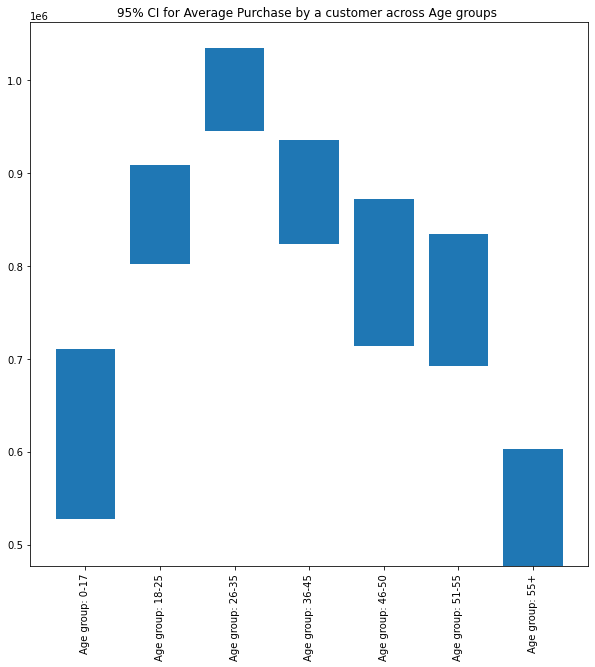

In [86]:
plt.figure(figsize = (10,10))
plt.bar(data_ci[0:7].sort_values("Group") ["Group"], data_ci[0:7].sort_values("Group")["Upper Limit 95"]-data_ci[0:7].\
        sort_values("Group")["Lower Limit 95"],bottom = data_ci[0:7].sort_values("Group")["Lower Limit 95"])
plt.xticks(rotation = 90)
plt.title("95% CI for Average Purchase by a customer across Age groups ")
plt.show()
# As can be seen, the maximum overlap at 95 5 ci in Purchase amount in successive age groups is for age groups is 46-50 and 
# 51-55
# The Purchase amount can be assumed to increase till age group 26-35 and decreases. Since there is overlap between 36-45, 
# 46-50 and 51-55, we cannot conclude with certainity that these age groups have different Purchases but it decreases as
# compared to Age group 26-35. Age group 55+ has lower Purchase as compared to age groups 46-50 and 51-55.

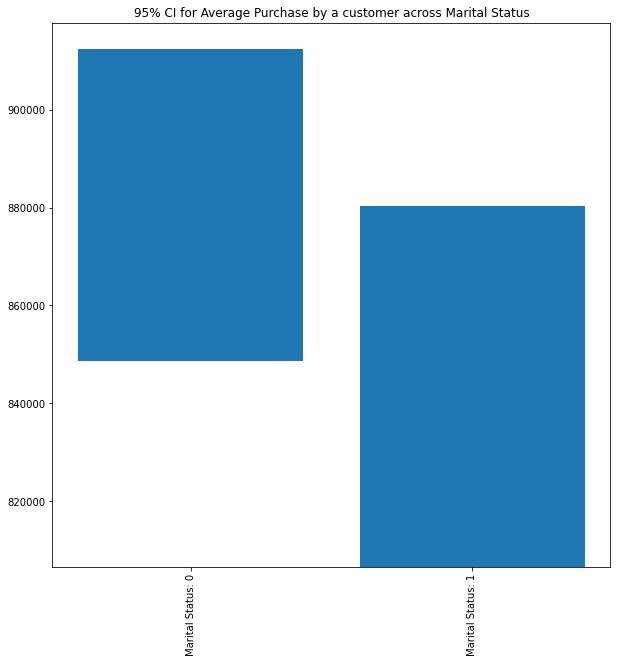

In [87]:
plt.figure(figsize = (10,10))
plt.bar(data_ci[7:9].sort_values("Group") ["Group"], data_ci[7:9].sort_values("Group")["Upper Limit 95"]-data_ci[7:9].\
        sort_values("Group")["Lower Limit 95"],bottom = data_ci[7:9].sort_values("Group")["Lower Limit 95"])
plt.xticks(rotation = 90)
plt.title("95% CI for Average Purchase by a customer across Marital Status")
plt.show()
# As can be seen, there is overlap in the 95% CI interval for Purchase amount for Marital Status 0 and 1. Hence, we cannot 
# conclude for sure about difference in Purchasing for the two groups/

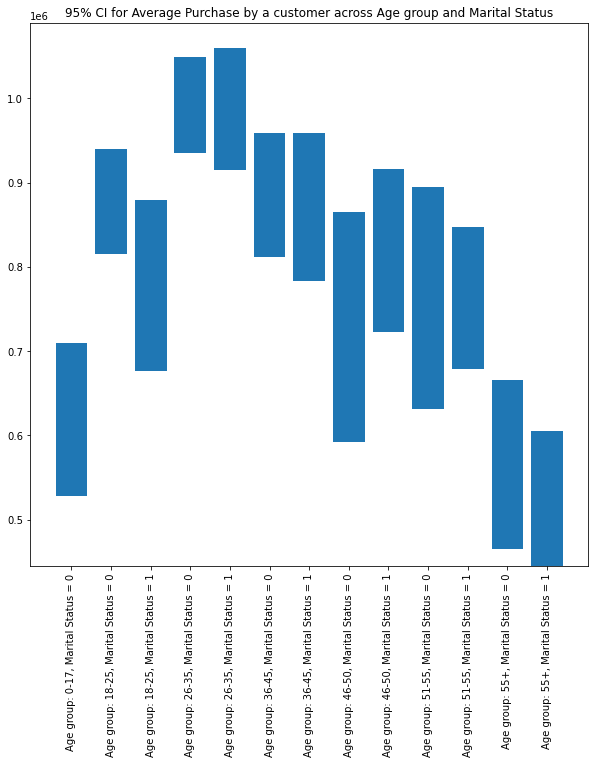

In [88]:
plt.figure(figsize = (10,10))
plt.bar(data_ci[9:].sort_values("Group") ["Group"], data_ci[9:].sort_values("Group")["Upper Limit 95"]-data_ci[9:].\
        sort_values("Group")["Lower Limit 95"],bottom = data_ci[9:].sort_values("Group")["Lower Limit 95"])
plt.xticks(rotation = 90)
plt.title("95% CI for Average Purchase by a customer across Age group and Marital Status")
plt.show()
# As can be seen from the graphs below, there is overlap in 95% CI for people of Martial Status 0 and 1 in different age groups.

In [89]:
df1 = data.groupby(["Gender", "Product_Category"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index().sort_values("Product_Category" )
df2 = data[["Gender","Product_Category", "Product_ID"]].drop_duplicates().groupby(["Gender","Product_Category"]).aggregate\
(Product_count = ("Product_ID", "count")).reset_index()
df3 = data[["Gender", "Product_Category", "User_ID"]].drop_duplicates().groupby(["Gender", "Product_Category"]).aggregate\
(Customer_count = ("User_ID", "count")).reset_index()
gen_prod_cat = pd.merge((pd.merge(df1, df2,on = ["Gender", "Product_Category"])),df3,on = ["Gender", "Product_Category"]).\
sort_values("Product_Category")
gen_prod_cat["Avg_Purchase"] = round(gen_prod_cat["Purchase_amt"]/gen_prod_cat["Customer_count"],2)
M,F = data[["User_ID","Gender"]].drop_duplicates()["Gender"].value_counts()
def per_customer(x):
    global M,F
    if x["Gender"] == "M":
        return round(x["Customer_count"]*100/M,2)
    else:
        return round(x["Customer_count"]*100/F,2)
gen_prod_cat["% of customer in respective gender"] = gen_prod_cat.apply( per_customer, axis = 1)
gen_prod_cat.sort_values(["Product_Category", "Gender"], inplace = True)
gen_prod_cat

,Gender,Product_Category,Purchase_amt,Product_count,Customer_count,Avg_Purchase,% of customer in respective gender
0,F,1,337631145,470,1593,211946.73,95.62
1,M,1,1572382609,490,4174,376708.82,98.79
2,F,10,22882193,23,513,44604.66,30.79
3,M,10,77955108,24,1815,42950.47,42.96
4,F,11,22161326,232,867,25560.93,52.04
5,M,11,91629789,254,2716,33737.04,64.28
6,F,12,2179897,25,555,3927.74,33.31
7,M,12,3151947,24,1012,3114.57,23.95
8,F,13,1072884,33,586,1830.86,35.17
9,M,13,2935717,35,1686,1741.23,39.91


In [90]:
# Observations from the above table for the given data:
# We can say that a particular gender prefers a paricular product category if the difference in average purchase between Male 
# and Female Genders is greater than 1000 and the percentage difference in customers in the genders is different by more than 
# 5% for a paarticular category.
for i in gen_prod_cat["Product_Category"].unique():
    x = gen_prod_cat.loc[gen_prod_cat["Product_Category"] == i, ::].reset_index(drop = True)
    if (abs(x.loc[0,"% of customer in respective gender"] - x.loc[1,"% of customer in respective gender"]) >= 5) & \
    (abs(x.loc[0,"Avg_Purchase"] - x.loc[1,"Avg_Purchase"]) >= 1000):
        print(f"Product Category {i} has gender preference")
        print(f"The Average Purchase by Female is {x.iloc[0,5]} in product category {i}")
        print(f"The Average Purchase by Male is {x.iloc[1,5]} in product category {i}")
        print(f"{ x.iloc[0,6]}% of Females have purchased from Product Category {i}")
        print(f"{ x.iloc[1,6]}% of Males have purchased from Product Category {i}", end = '\n')
        print()              

Product Category 10 has gender preference
The Average Purchase by Female is 44604.66 in product category 10
The Average Purchase by Male is 42950.47 in product category 10
30.79% of Females have purchased from Product Category 10
42.96% of Males have purchased from Product Category 10

Product Category 11 has gender preference
The Average Purchase by Female is 25560.93 in product category 11
The Average Purchase by Male is 33737.04 in product category 11
52.04% of Females have purchased from Product Category 11
64.28% of Males have purchased from Product Category 11

Product Category 14 has gender preference
The Average Purchase by Female is 22657.69 in product category 14
The Average Purchase by Male is 19308.75 in product category 14
22.69% of Females have purchased from Product Category 14
14.04% of Males have purchased from Product Category 14

Product Category 15 has gender preference
The Average Purchase by Female is 30681.26 in product category 15
The Average Purchase by Male is

In [91]:
# Using 2 sample t-test to understand if there is significant difference in the Purchase made by genders in different Product
# Category
prod_cat= []
null_hyp = []
alt_hyp = []
t_score = []
p_val = []
for i in data["Product_Category"].unique():
    prod_cat.append(i)
    x = data[(data["Product_Category"] == i) & (data["Gender"] == 'M')]["Purchase"]
    y = data[(data["Product_Category"] == i) & (data["Gender"] == 'F')]["Purchase"]
    null_hyp.append("Average purchase by male is equal to average purchase by female for product category {i}")
    alt_hyp.append("Average purchase by male is not equal to average purchase by female for product category {i}")
    t_stat, p_value = ttest_ind(x,y,alternative = 'two-sided')
    t_score.append(t_stat)
    p_val.append(p_value)
ttest_gen_pur = pd.DataFrame([prod_cat, null_hyp, alt_hyp, t_score, p_val]).T.rename(columns = {0: "Product_Category", 1: "Null Hypothesis",\
                                                                2: "Alternate Hypothesis", 3: "T_Statistic",4: "P_value"})
ttest_gen_pur[ttest_gen_pur["P_value"] < 0.05]
# Below listed are the product categories where Average amount spent by Male and Female customer groups are different using 
# 95% CI.

,Product_Category,Null Hypothesis,Alternate Hypothesis,T_Statistic,P_value
0,3,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-5.434779,0.0
2,12,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-10.070974,0.0
4,5,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-8.481791,0.0
5,4,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-11.245711,0.0
6,2,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-3.752929,0.000175
7,6,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,4.623822,0.000004
8,14,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-4.869503,0.000001
10,13,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,-2.780882,0.005439
14,18,Average purchase by male is equal to average p...,Average purchase by male is not equal to avera...,3.572031,0.00036


In [92]:
gen_data_pur = data.groupby(["User_ID","Gender"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index()
gen_data_pur

,User_ID,Gender,Purchase_amt
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


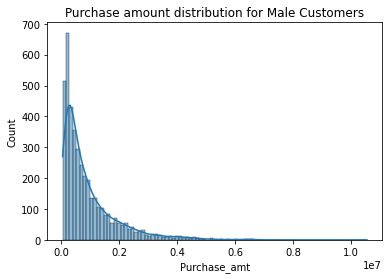

In [93]:
sns.histplot(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"], kde = "True")
plt.title("Purchase amount distribution for Male Customers")
plt.show()
# The distribution of Purchase amount for Males appears to be right skewed as seen in the histplot below

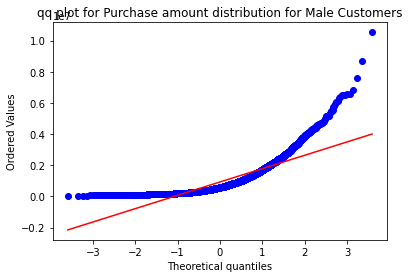

In [94]:
stats.probplot(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"], dist="norm", plot=py)
plt.title("qq plot for Purchase amount distribution for Male Customers")
py.show()
# As seen from the image below, we can see that the distribution of Purchase amount for Males do not follow Normal Distribution.
# As the data is right skewed, we can apply log normal distribution to convert it to a normal distribution.

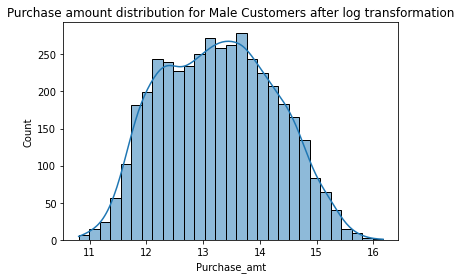

In [95]:
sns.histplot(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log), kde = "True")
plt.title("Purchase amount distribution for Male Customers after log transformation")
plt.show()
# after applying log transformation, the Purchase distribution appears to be normally distributed.

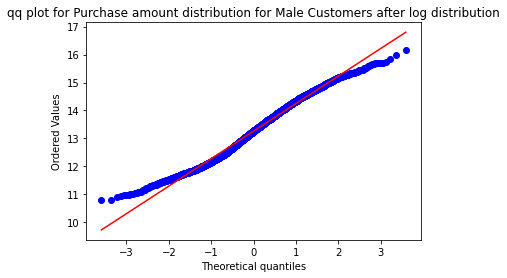

In [96]:
stats.probplot(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log), dist="norm", plot=py)
plt.title("qq plot for Purchase amount distribution for Male Customers after log distribution")
py.show() 
# As can be seen from qq plot below, after log normal transformation, the distribution of Purchase for Males are closer to Normal
# Distribution. Hence, we can use log transformation and create the 95% interval for average Total Purchase by a male customer.

In [97]:
# Getting upper and lower limit of Purchase for 95% CI for Male Customers.
male_pur_mean = gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log).mean()
male_pur_std = gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log).std()/\
len(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"])**0.5
lower_limit_male_purchase, upper_limit_male_purchase = np.exp(norm.ppf([0.025,0.975],loc = male_pur_mean,scale = male_pur_std))\
.round(2)
lower_limit_male_purchase,round(np.exp(male_pur_mean),2), upper_limit_male_purchase

(558844.35, 575777.41, 593223.54)

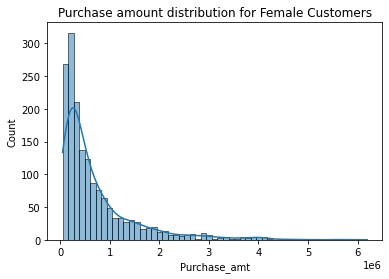

In [98]:
sns.histplot(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"], kde = True)
plt.title("Purchase amount distribution for Female Customers")
plt.show()
# The Purchase amount distribution for Female Category also appears to be right skewed. Hence we need to transform this to Normal 
# data before calculating the 95% CI for Purchase amount for Female Category.

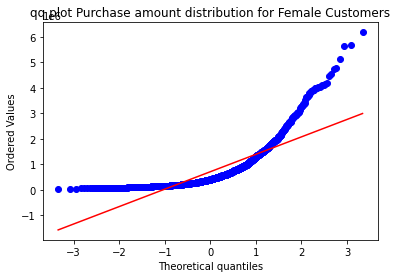

In [99]:
stats.probplot(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"], dist="norm", plot=py)
plt.title("qq plot Purchase amount distribution for Female Customers")
py.show()
# As seen from the image below, we can see that the distribution of Purchase amount for Females do not follow Normal Distribution.
# As the data is right skewed, we can apply log normal distribution to convert it to a normal distribution.

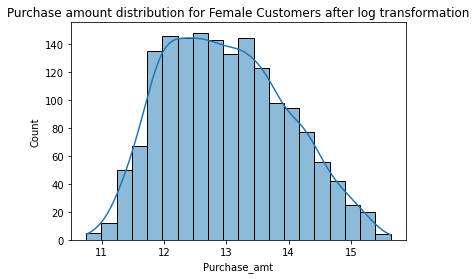

In [100]:
sns.histplot(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log), kde = "True")
plt.title("Purchase amount distribution for Female Customers after log transformation")
plt.show()
# after applying log transformation, the Purchase distribution appears to be normally distributed for Female Distribution

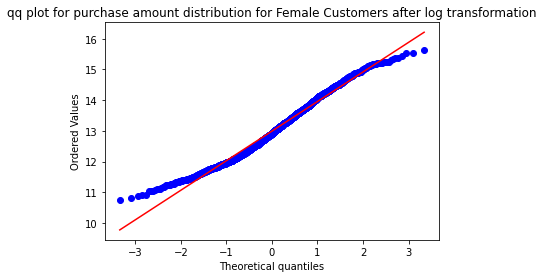

In [101]:
stats.probplot(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log), dist="norm", plot=py)
plt.title("qq plot for purchase amount distribution for Female Customers after log transformation")
py.show() 
# As can be seen from qq plot below, after log normal transformation, the distribution of Purchase for Females are closer to 
# Normal Distribution. Hence, we can use log transformation and create the 95% interval for average Total Purchase by a customer.

In [102]:
# Getting upper and lower limit of Purchase for 95% CI for Female Customers.
female_pur_mean = gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log).mean()
female_pur_std = gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log).std()/\
(len(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"]))**0.5
lower_limit_female_purchase, upper_limit_female_purchase = np.exp(norm.ppf([0.025,0.975],loc = female_pur_mean,scale = \
                               female_pur_std)).round(2)
lower_limit_female_purchase,round(np.exp(female_pur_mean),2), upper_limit_female_purchase

(419037.82, 439015.9, 459946.45)

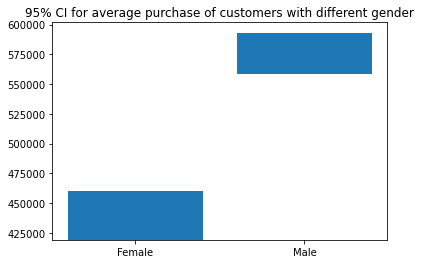

In [103]:
plt.bar(x = ["Female","Male"], bottom = [lower_limit_female_purchase, lower_limit_male_purchase], height = \
[upper_limit_female_purchase - lower_limit_female_purchase, upper_limit_male_purchase - lower_limit_male_purchase])
plt.title("95% CI for average purchase of customers with different gender")
plt.show()
# As can be seen, the average purchase made by a male customer is greater than that made by female customer.

In [104]:
# st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
x = gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log)
y = gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log)
np.exp(stats.t.interval(alpha = 0.95, df = len(x)-1, loc = np.mean(x), scale = stats.sem(x)))

array([419023.62536337, 459962.03567058])

In [105]:
np.exp(stats.t.interval(alpha = 0.95, df = len(y)-1, loc = np.mean(y), scale = stats.sem(y)))
# As can be seen, the Average Purchase amount is greater for Male than that of female.

array([558839.56776615, 593228.61485073])

In [106]:
# Using Bootstrapping method to create CI for Avg Purchase for Purchases by Female Customers.
samp_size = []
samp_mean = []
for i in range(30,len(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log)),500):
    for j in range(500):
        samp_size.append(i)
        z = np.random.randint(low = 0, high = len(gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"])-1,size = i)
        z1 = gen_data_pur.loc[gen_data_pur["Gender"] == "F", "Purchase_amt"].apply(np.log).reset_index(drop = True)[z]
        samp_mean.append(z1.mean())
df = pd.DataFrame([samp_size, samp_mean]).T.rename(columns = {0:"samp_size", 1: "data"})        

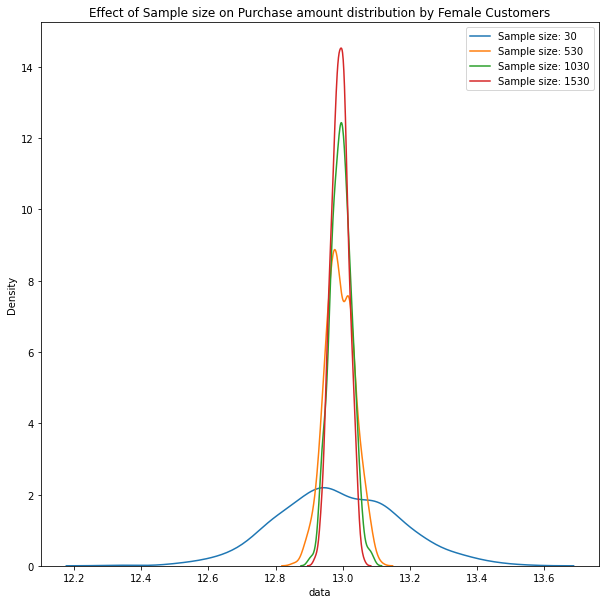

In [107]:
plt.figure(figsize = (10,10))
for i in df["samp_size"].unique():
    sns.distplot(df.loc[df["samp_size"]==i,"data"], hist = False, label = f"Sample size: {int(i)}")
plt.legend()
plt.title("Effect of Sample size on Purchase amount distribution by Female Customers")
plt.show()
# Effect of increasing the sample size:
# As the sample size increases, the peak of the distribution increases and the spread decreases. Hence, the width of 95% CI
# should decrease with increase in Sample size

In [108]:
N = []
lower_ci = []
upper_ci = []
gend = []
for i in df["samp_size"].unique():
    N.append(i)
    df3 = df.loc[df["samp_size"] == i, "data"]
    low_lim, up_lim = np.exp(stats.t.interval(alpha = 0.95, df = len(df3)-1, loc = np.mean(df3), scale = np.std(df3)))
    lower_ci.append(low_lim)
    upper_ci.append(up_lim)
    gend.append("F")
gend_ci_avg_pur = pd.DataFrame(list(zip(N,gend, lower_ci,upper_ci)), columns =\
                               ["N", "Gender", "Lower_limit_CI", "Upper_Limit_CI"])
gend_ci_avg_pur

,N,Gender,Lower_limit_CI,Upper_Limit_CI
0,30.0,F,307489.534070,620019.391542
1,530.0,F,403104.038287,476974.842550
2,1030.0,F,413762.812804,467514.467875
3,1530.0,F,417250.814370,460939.990478


In [109]:
# Using Bootstrapping method to create CI for Avg Purchase for Purchases by Male Customers.
samp_size = []
samp_mean = []
for i in range(30,len(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log)),500):
    for j in range(500):
        samp_size.append(i)
        z = np.random.randint(low = 0, high = len(gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"])-1,size = i)
        z1 = gen_data_pur.loc[gen_data_pur["Gender"] == "M", "Purchase_amt"].apply(np.log).reset_index(drop = True)[z]
        samp_mean.append(z1.mean())
df = pd.DataFrame([samp_size, samp_mean]).T.rename(columns = {0:"samp_size", 1: "data"})    

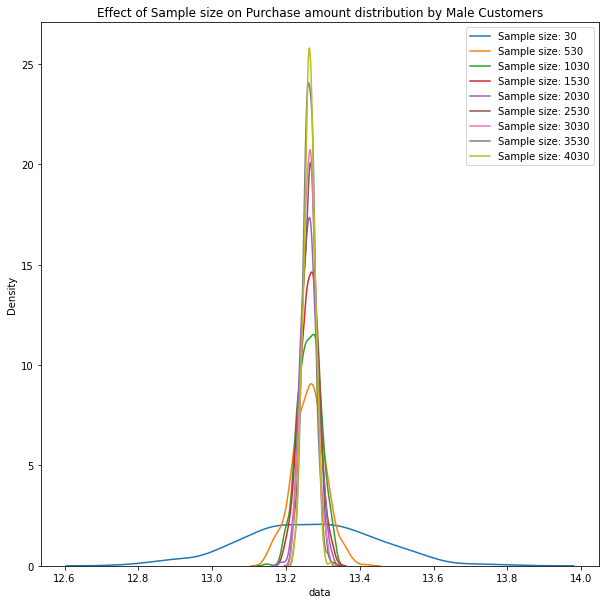

In [110]:
plt.figure(figsize = (10,10))
for i in df["samp_size"].unique():
    sns.distplot(df.loc[df["samp_size"]==i,"data"], hist = False, label = f"Sample size: {int(i)}")
plt.legend()
plt.title("Effect of Sample size on Purchase amount distribution by Male Customers")
plt.show()
# Effect of increasing the sample size:
# As the sample size increases, the peak of the distribution increases and the spread decreases. Hence, the width of 95% CI
# should decrease with increase in Sample size

In [111]:
N = []
lower_ci = []
upper_ci = []
gend = []
for i in df["samp_size"].unique():
    N.append(i)
    df3 = df.loc[df["samp_size"] == i, "data"]
    low_lim, up_lim = np.exp(stats.t.interval(alpha = 0.95, df = len(df3)-1, loc = np.mean(df3), scale = np.std(df3)))
    lower_ci.append(low_lim)
    upper_ci.append(up_lim)
    gend.append("M")
gend_ci_avg_pur = gend_ci_avg_pur.append(pd.DataFrame(list(zip(N,gend, lower_ci,upper_ci)), columns =\
                               ["N", "Gender", "Lower_limit_CI", "Upper_Limit_CI"])).reset_index(drop = True)

In [112]:
gend_ci_avg_pur
# The below 95% CI has been created using t distribution. 
# As the sample size increases, the lower limit CI increases and the upper limit CI decreases. Hence, width of CI decreases.

,N,Gender,Lower_limit_CI,Upper_Limit_CI
0,30.0,F,307489.534070,620019.391542
1,530.0,F,403104.038287,476974.842550
2,1030.0,F,413762.812804,467514.467875
3,1530.0,F,417250.814370,460939.990478
4,30.0,M,405757.563351,815730.183046
5,530.0,M,526879.331397,627400.205552
6,1030.0,M,542108.035457,611563.514464
7,1530.0,M,546264.969172,605490.271253
8,2030.0,M,550661.802260,601650.223756
9,2530.0,M,555100.470329,599234.364222


### Analyzing the Purchases made by customers having different Marital Status

In [113]:
mar_data_pur = data.groupby(["User_ID", "Marital_Status"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index()
mar_data_pur

,User_ID,Marital_Status,Purchase_amt
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [114]:
mar_pur_0 = mar_data_pur.loc[mar_data_pur["Marital_Status"] == '0', ::].reset_index(drop = True)
mar_pur_1 = mar_data_pur.loc[mar_data_pur["Marital_Status"] == '1', ::].reset_index(drop = True)

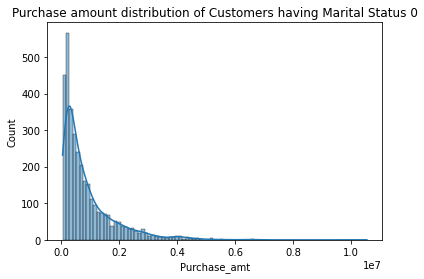

In [115]:
sns.histplot(mar_pur_0["Purchase_amt"], kde = True)
plt.title("Purchase amount distribution of Customers having Marital Status 0")
plt.show()
# As can be seen from the plot below, the Purchase amount distribution for customers with Marital Status 0 is right skewed.

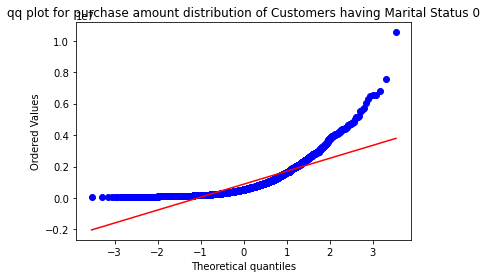

In [116]:
stats.probplot(mar_pur_0["Purchase_amt"], dist="norm", plot=py)
plt.title("qq plot for purchase amount distribution of Customers having Marital Status 0")
py.show() 
# As can be seen from below qq-plot, the distribution of Purchase made by customers with Marital Status 0 is not Normal.
# Hence, we need to transform the data to Normal before calculating 95% CI for the group.

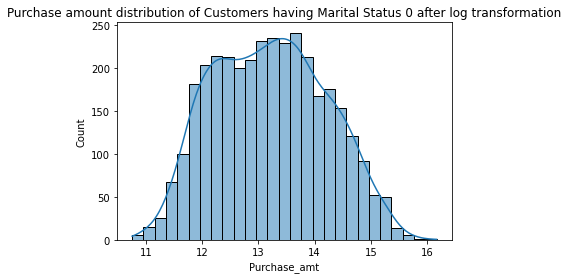

In [117]:
sns.histplot(mar_pur_0["Purchase_amt"].apply(np.log), kde = True)
plt.title("Purchase amount distribution of Customers having Marital Status 0 after log transformation")
plt.show()
# As can be seen from the plot below, the Purchase amount distribution for customers with Marital Status 0 becomes approximately 
# Normal after applying Log transformation.

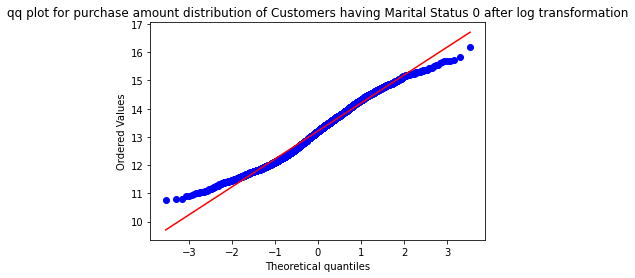

In [118]:
stats.probplot(mar_pur_0["Purchase_amt"].apply(np.log), dist="norm", plot=py)
plt.title("qq plot for purchase amount distribution of Customers having Marital Status 0 after log transformation")
py.show()
# After applying log transformation, the Purchase distribution for Customers with Marital Status 0 approximately becomes normal 
# after log transformation.

In [119]:
# Getting upper and lower limit of average Purchase for 95% CI for Customers with Marital status 0.
mar0_pur_mean = mar_pur_0["Purchase_amt"].apply(np.log).mean()
mar0_pur_std = mar_pur_0["Purchase_amt"].apply(np.log).std()/len(mar_pur_0["Purchase_amt"])**0.5
lower_limit_mar0_purchase, upper_limit_mar0_purchase = np.exp(norm.ppf([0.025,0.975],loc = mar0_pur_mean,scale = mar0_pur_std))\
.round(2)
lower_limit_mar0_purchase,round(np.exp(mar0_pur_mean),2), upper_limit_mar0_purchase

(525697.2, 543544.13, 561996.94)

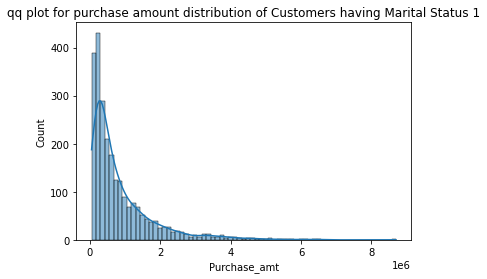

In [120]:
sns.histplot(mar_pur_1["Purchase_amt"], kde = True)
plt.title("qq plot for purchase amount distribution of Customers having Marital Status 1")
plt.show()
# As can be seen from the plot below, the Purchase amount distribution for customers with Marital Status 1 is right skewed.

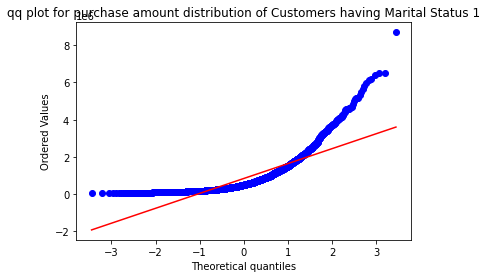

In [121]:
stats.probplot(mar_pur_1["Purchase_amt"], dist="norm", plot=py)
plt.title("qq plot for purchase amount distribution of Customers having Marital Status 1")
py.show() 
# As can be seen from below qq-plot, the distribution of Purchase made by customers with Marital Status 1 is not Normal.
# Hence, we need to transform the data to Normal before calculating 95% CI for the group.

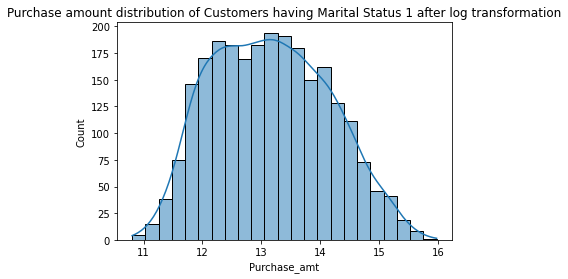

In [122]:
sns.histplot(mar_pur_1["Purchase_amt"].apply(np.log), kde = True)
plt.title("Purchase amount distribution of Customers having Marital Status 1 after log transformation")
plt.show()
# As can be seen from the plot below, the Purchase amount distribution for customers with Marital Status 1 becomes approximately 
# Normal after applying Log transformation.

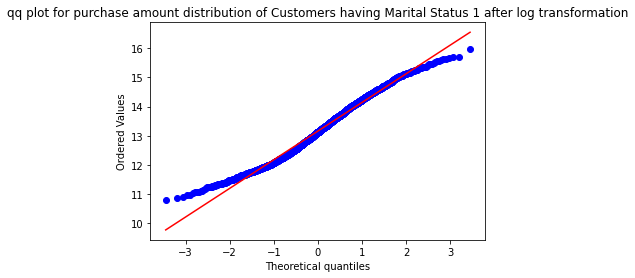

In [123]:
stats.probplot(mar_pur_1["Purchase_amt"].apply(np.log), dist="norm", plot=py)
plt.title("qq plot for purchase amount distribution of Customers having Marital Status 1 after log transformation")
py.show()
# After applying log transformation, the Purchase distribution for Customers with Marital Status 1 approximately becomes normal 
# after log transformation.

In [124]:
# Getting upper and lower limit of Purchase for 95% CI for Customers with Marital status 1.
mar1_pur_mean = mar_pur_1["Purchase_amt"].apply(np.log).mean()
mar1_pur_std = mar_pur_1["Purchase_amt"].apply(np.log).std()/len(mar_pur_1["Purchase_amt"])**0.5
lower_limit_mar1_purchase, upper_limit_mar1_purchase = np.exp(norm.ppf([0.025,0.975],loc = mar1_pur_mean,scale = mar1_pur_std))\
.round(2)
lower_limit_mar1_purchase,round(np.exp(mar1_pur_mean),2), upper_limit_mar1_purchase

(499607.08, 519399.38, 539975.76)

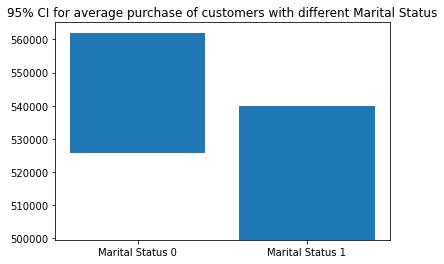

In [125]:
plt.bar(x = ["Marital Status 0","Marital Status 1"], bottom = [lower_limit_mar0_purchase, lower_limit_mar1_purchase], \
        height = [upper_limit_mar0_purchase - lower_limit_mar0_purchase, upper_limit_mar1_purchase - \
                  lower_limit_mar1_purchase])
plt.title("95% CI for average purchase of customers with different Marital Status")
plt.show()
# As can be seen, 95% CI for the average purchase made by a customer with Marital Status 0 overlaps with average purchase made by
# customer with Marital Status 1.

In [126]:
np.exp(stats.t.interval(alpha = 0.95, df = len(mar_pur_0)-1, loc = np.mean(mar_pur_0["Purchase_amt"].apply(np.log)), scale = \
                        stats.sem(mar_pur_0["Purchase_amt"].apply(np.log))))

array([525690.97570531, 562003.59317476])

In [127]:
np.exp(stats.t.interval(alpha = 0.95, df = len(mar_pur_0)-1, loc = np.mean(mar_pur_1["Purchase_amt"].apply(np.log)), scale = \
                        stats.sem(mar_pur_1["Purchase_amt"].apply(np.log))))
# As can be seen, even 95% CI for average purchase created using T distribution overlaps for customers with Marital Status 0 and 
# 1.

array([499600.20125979, 539983.1981923 ])

In [128]:
# Using Bootstrapping method to create CI for Avg Purchase for Purchases by Customers with Marital Status 0.
samp_size = []
samp_mean = []
for i in range(30,len(mar_pur_0["Purchase_amt"].apply(np.log)),500):
    for j in range(500):
        samp_size.append(i)
        z = np.random.randint(low = 0, high = len(mar_pur_0["Purchase_amt"]),size = i)
        z1 = mar_pur_0["Purchase_amt"].apply(np.log).reset_index(drop = True)[z]
        samp_mean.append(z1.mean())
df = pd.DataFrame([samp_size, samp_mean]).T.rename(columns = {0:"samp_size", 1: "data"}) 

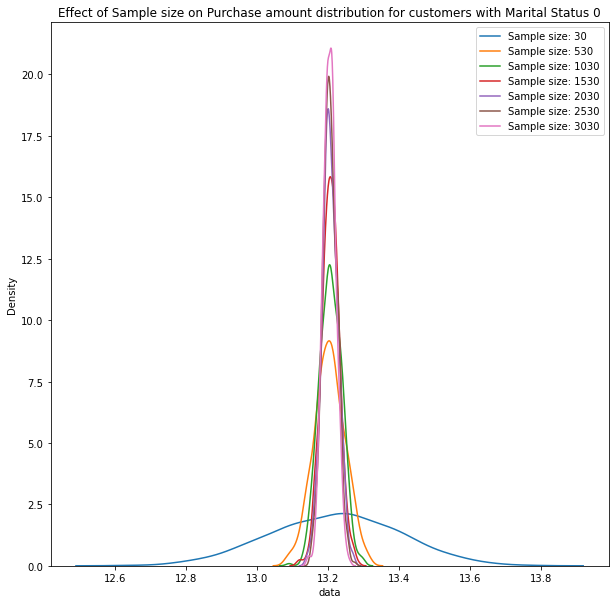

In [129]:
plt.figure(figsize = (10,10))
for i in df["samp_size"].unique():
    sns.distplot(df.loc[df["samp_size"]==i,"data"], hist = False, label = f"Sample size: {int(i)}")
plt.legend()
plt.title("Effect of Sample size on Purchase amount distribution for customers with Marital Status 0")
plt.show()
# Effect of increasing the sample size:
# As the sample size increases, the peak of the distribution increases and the spread decreases. Hence, the width of 95% CI
# should decrease with increase in Sample size

In [130]:
N = []
lower_ci = []
upper_ci = []
mar = []
for i in df["samp_size"].unique():
    N.append(i)
    df3 = df.loc[df["samp_size"] == i, "data"]
    low_lim, up_lim = np.exp(stats.t.interval(alpha = 0.95, df = len(df3)-1, loc = np.mean(df3), scale = np.std(df3)))
    lower_ci.append(low_lim)
    upper_ci.append(up_lim)
    mar.append("0")
mar_ci_avg_pur = pd.DataFrame(list(zip(N,mar, lower_ci,upper_ci)), columns =\
                               ["N", "Marital Status", "Lower_limit_CI", "Upper_Limit_CI"]).reset_index(drop = True)
mar_ci_avg_pur

,N,Marital Status,Lower_limit_CI,Upper_Limit_CI
0,30.0,0,386554.689738,786434.133840
1,530.0,0,498622.605024,591301.167801
2,1030.0,0,512540.919827,578976.096676
3,1530.0,0,518342.564282,571798.043250
4,2030.0,0,520859.111149,568496.646556
5,2530.0,0,523008.149178,565709.325030
6,3030.0,0,524284.801732,562867.188502


In [131]:
# Using Bootstrapping method to create CI for Avg Purchase for Purchases by Customers with Marital Status 1.
samp_size = []
samp_mean = []
for i in range(30,len(mar_pur_1["Purchase_amt"].apply(np.log)),500):
    for j in range(500):
        samp_size.append(i)
        z = np.random.randint(low = 0, high = len(mar_pur_1["Purchase_amt"]),size = i)
        z1 = mar_pur_1["Purchase_amt"].apply(np.log).reset_index(drop = True)[z]
        samp_mean.append(z1.mean())
df = pd.DataFrame([samp_size, samp_mean]).T.rename(columns = {0:"samp_size", 1: "data"}) 

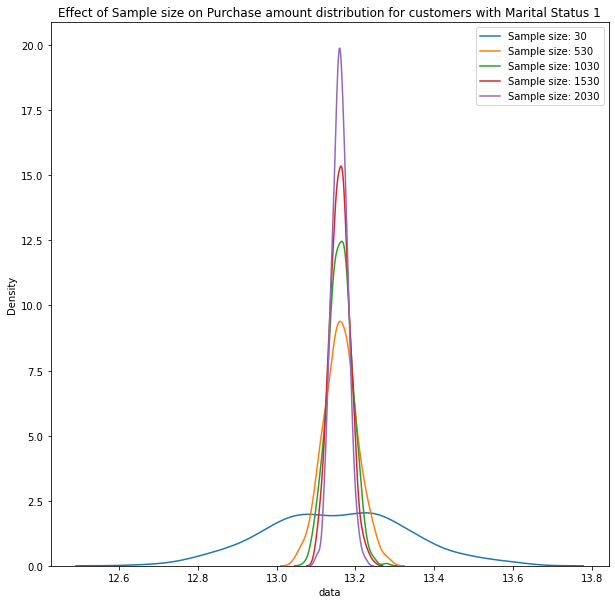

In [132]:
plt.figure(figsize = (10,10))
for i in df["samp_size"].unique():
    sns.distplot(df.loc[df["samp_size"]==i,"data"], hist = False, label = f"Sample size: {int(i)}")
plt.legend()
plt.title("Effect of Sample size on Purchase amount distribution for customers with Marital Status 1")
plt.show()
# Effect of increasing the sample size:
# As the sample size increases, the peak of the distribution increases and the spread decreases. Hence, the width of 95% CI
# should decrease with increase in Sample size

In [133]:
N = []
lower_ci = []
upper_ci = []
mar = []
for i in df["samp_size"].unique():
    N.append(i)
    df3 = df.loc[df["samp_size"] == i, "data"]
    low_lim, up_lim = np.exp(stats.t.interval(alpha = 0.95, df = len(df3)-1, loc = np.mean(df3), scale = np.std(df3)))
    lower_ci.append(low_lim)
    upper_ci.append(up_lim)
    mar.append("1")
mar_ci_avg_pur = mar_ci_avg_pur.append(pd.DataFrame(list(zip(N,mar, lower_ci,upper_ci)), columns =\
                               ["N", "Marital Status", "Lower_limit_CI", "Upper_Limit_CI"])).reset_index(drop = True)

In [134]:
mar_ci_avg_pur
# The below 95% CI has been created using t distribution. 
# As the sample size increases, the lower limit CI increases and the upper limit CI decreases. Hence, width of CI decreases.
# The 95% CI for average purchas made by customers with different Marital Status are overlapping.

,N,Marital Status,Lower_limit_CI,Upper_Limit_CI
0,30.0,0,386554.689738,786434.133840
1,530.0,0,498622.605024,591301.167801
2,1030.0,0,512540.919827,578976.096676
3,1530.0,0,518342.564282,571798.043250
4,2030.0,0,520859.111149,568496.646556
5,2530.0,0,523008.149178,565709.325030
6,3030.0,0,524284.801732,562867.188502
7,30.0,1,364593.612308,729690.631658
8,530.0,1,478494.567330,565422.870982
9,1030.0,1,489321.894292,551861.782060


### Analyzing the Purchases made by Customers from different age groups.

In [135]:
age_data_pur = data.groupby(["User_ID", "Age"]).aggregate(Purchase_amt = ("Purchase", "sum")).reset_index()
age_data_pur["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

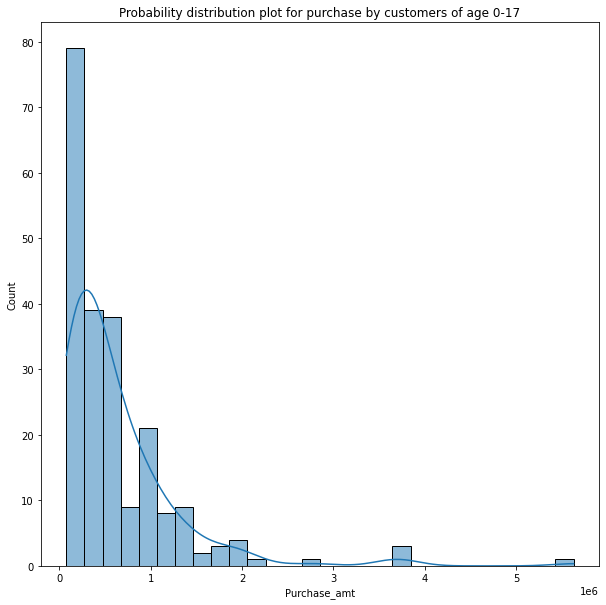

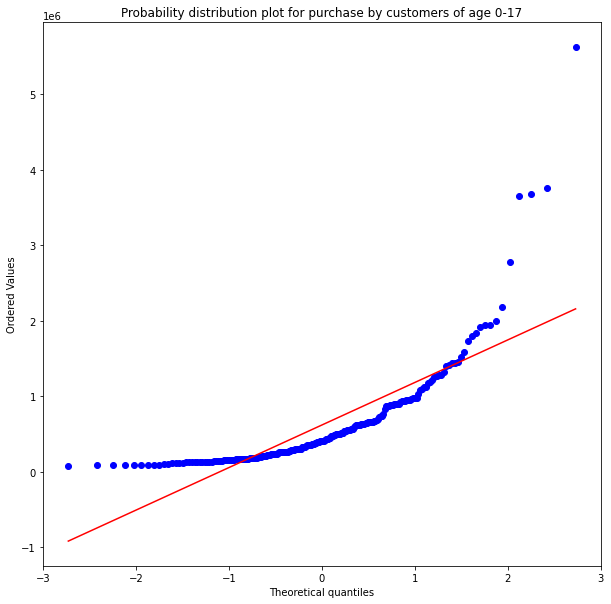

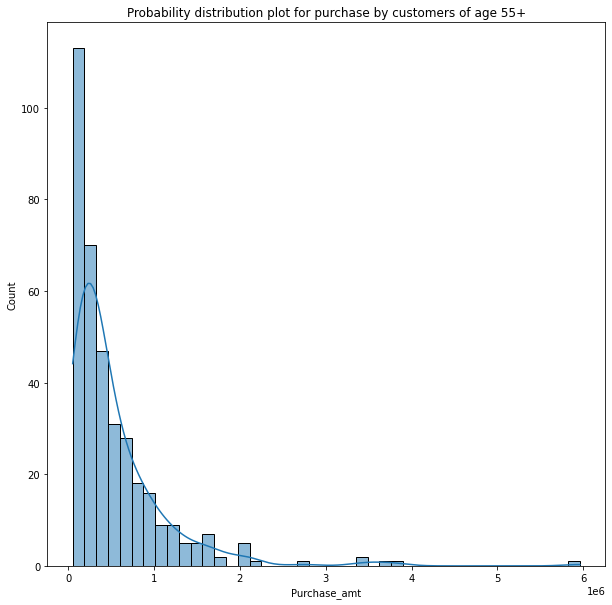

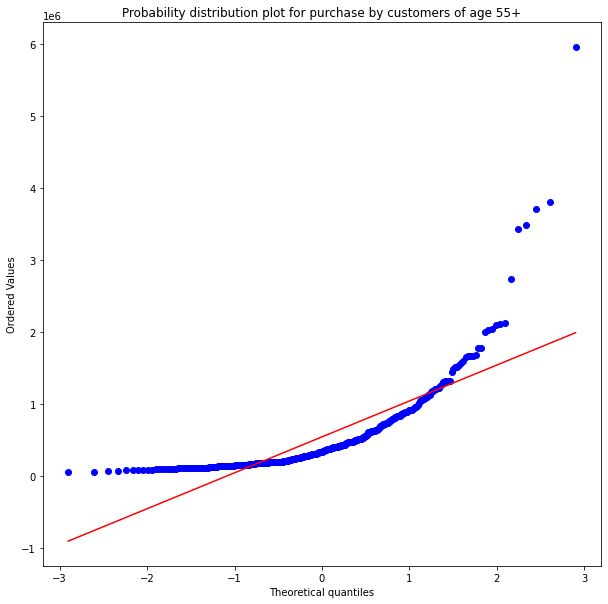

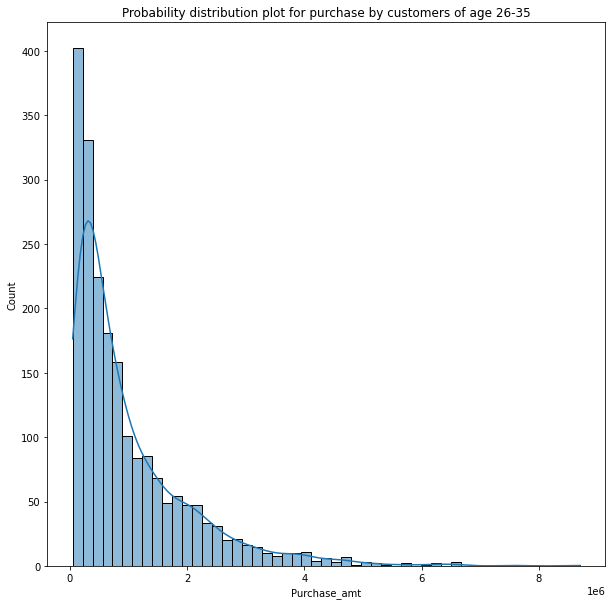

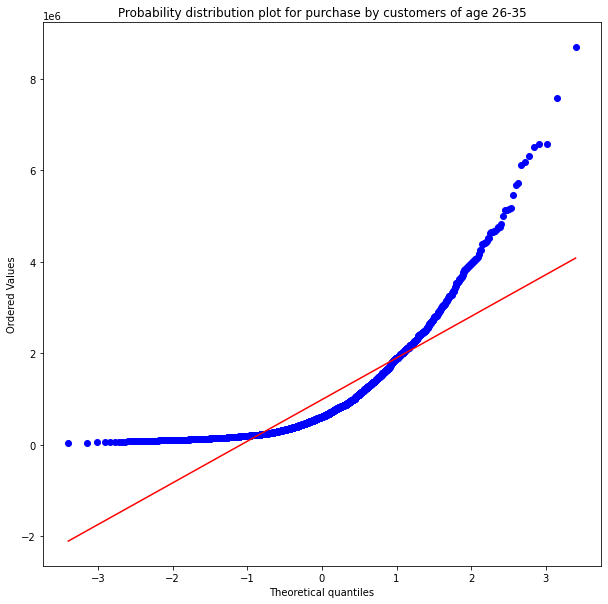

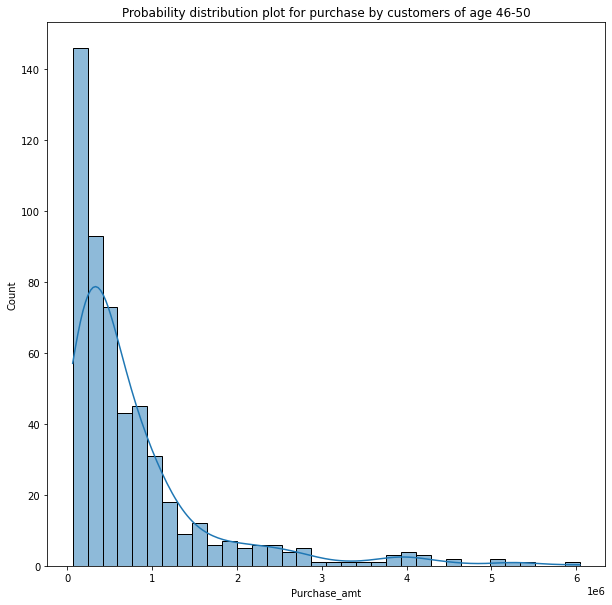

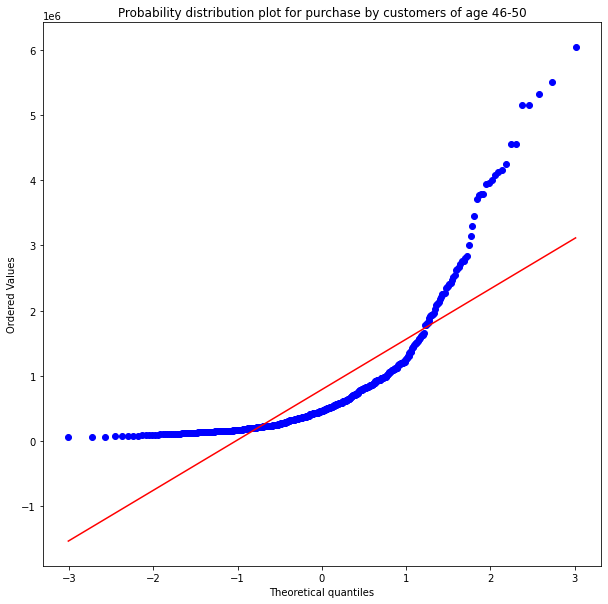

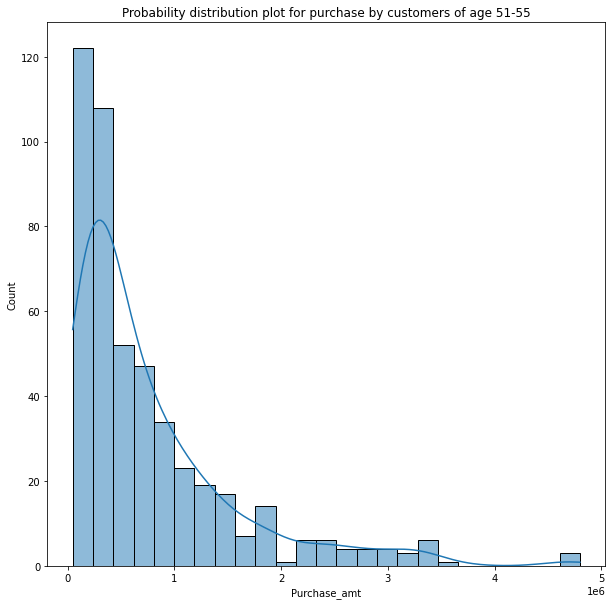

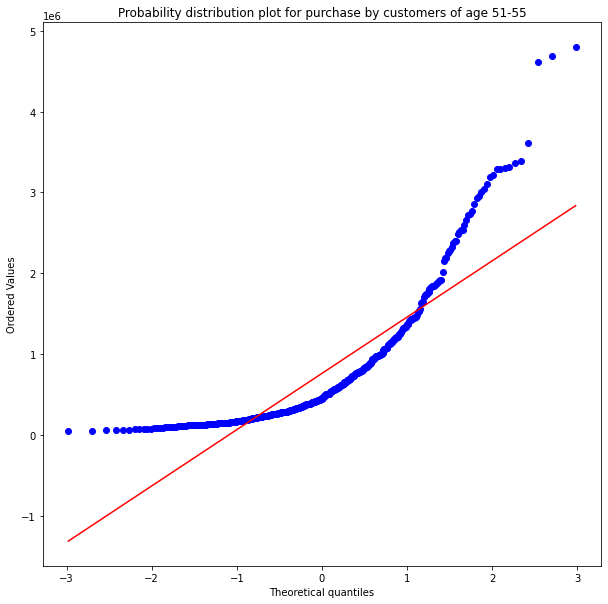

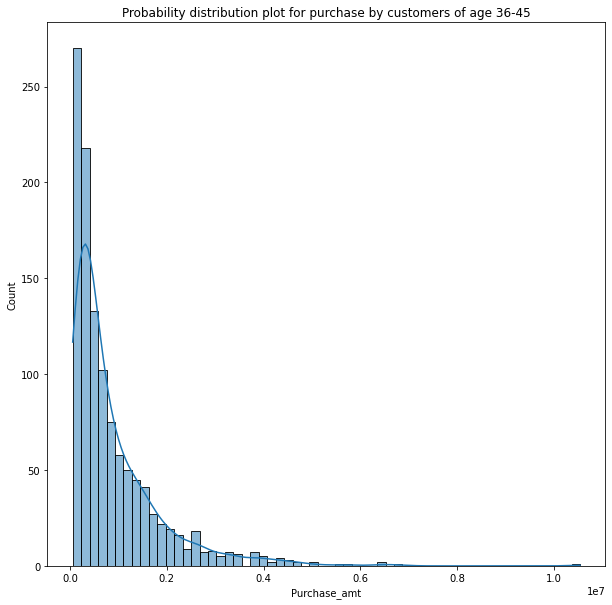

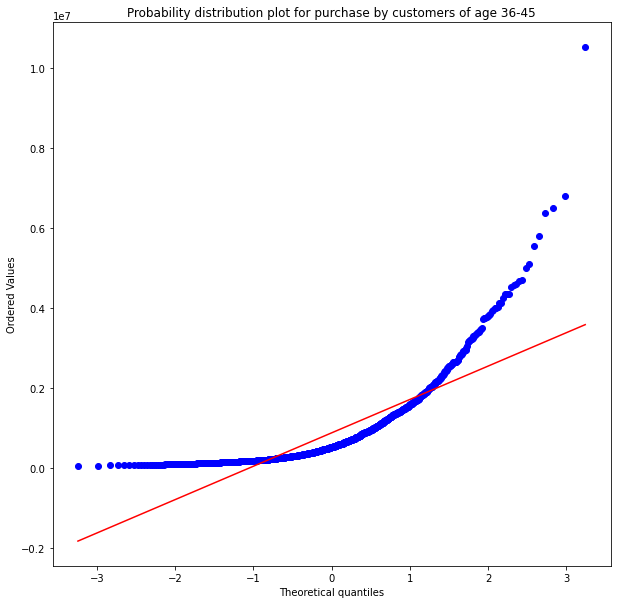

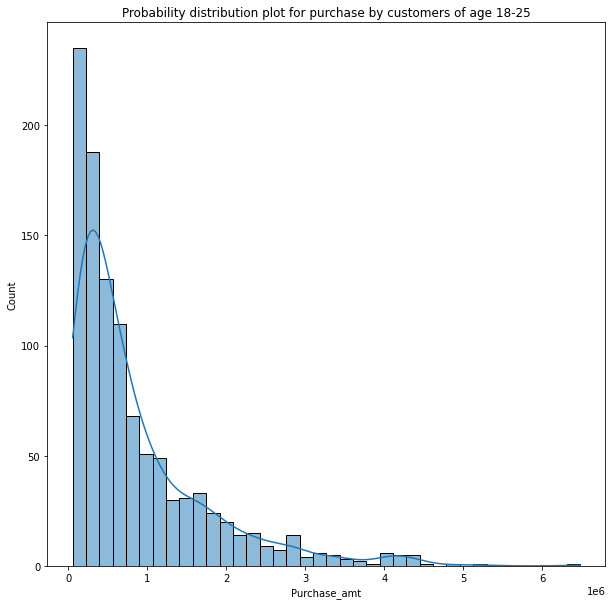

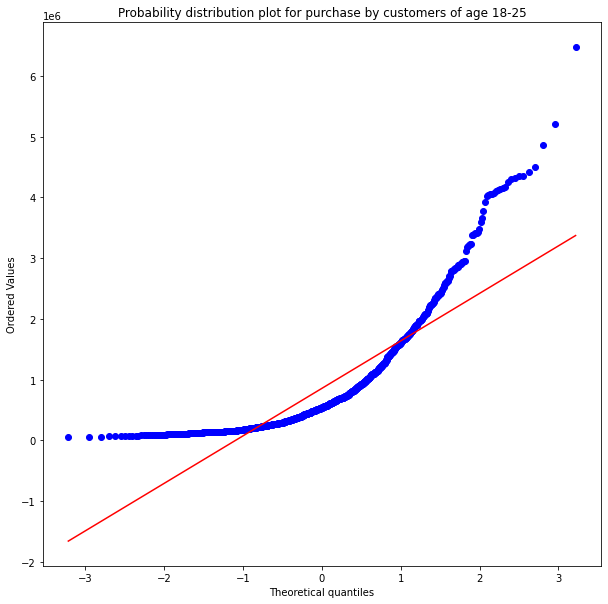

In [136]:
for i in age_data_pur["Age"].unique():
    plt.figure(figsize = (10,10))
    sns.histplot(age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"], kde = True)
    plt.title(f"Probability distribution plot for purchase by customers of age {i}")
    plt.show()
    plt.figure(figsize = (10,10))
    stats.probplot(age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"], dist="norm", plot=py)
    plt.title(f"Probability distribution plot for purchase by customers of age {i}")
    py.show() 
# As csn be seen fromthe below plots, the Purchase amount distribution for all age groups are right skewed. Hence, they need to
# be transformed to Normal distribution before creating the Confidence interval for them.

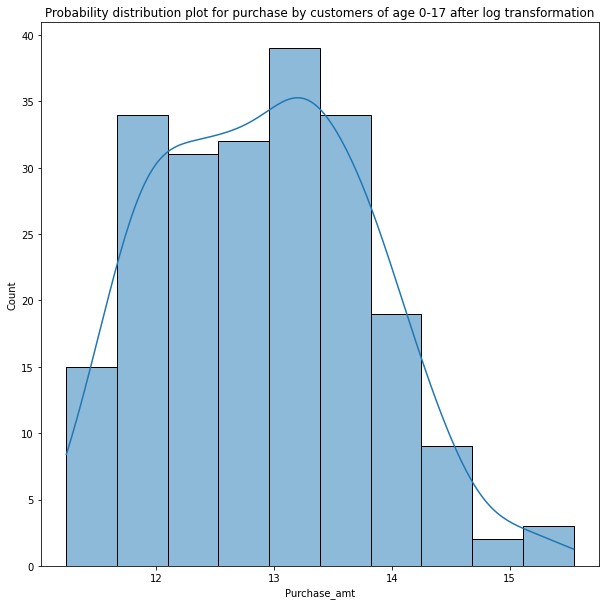

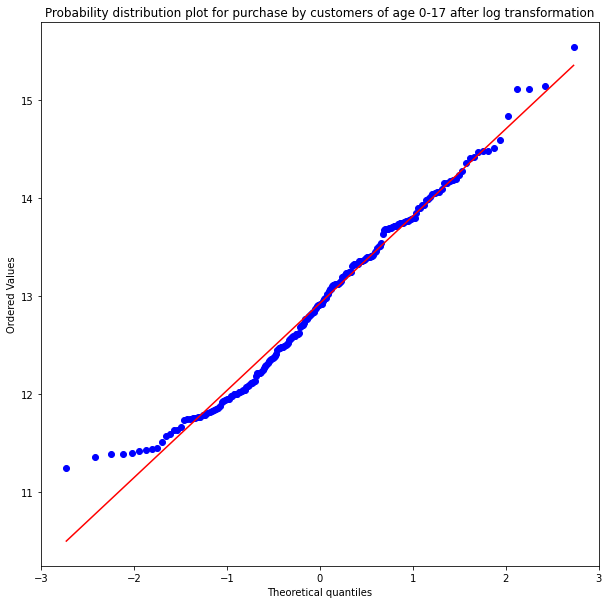

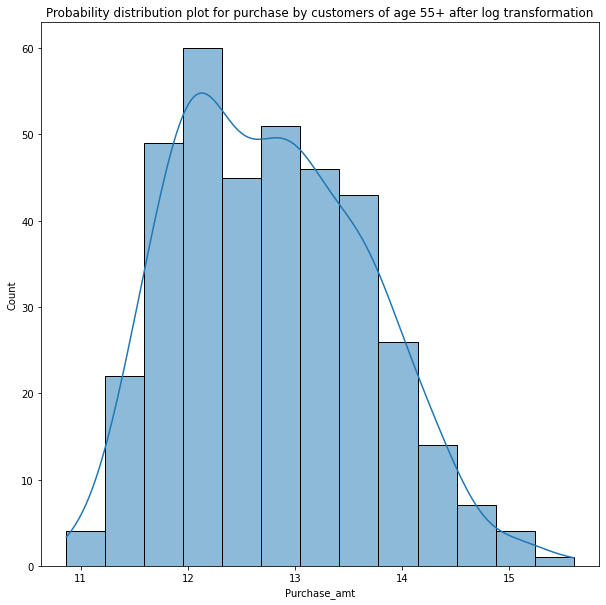

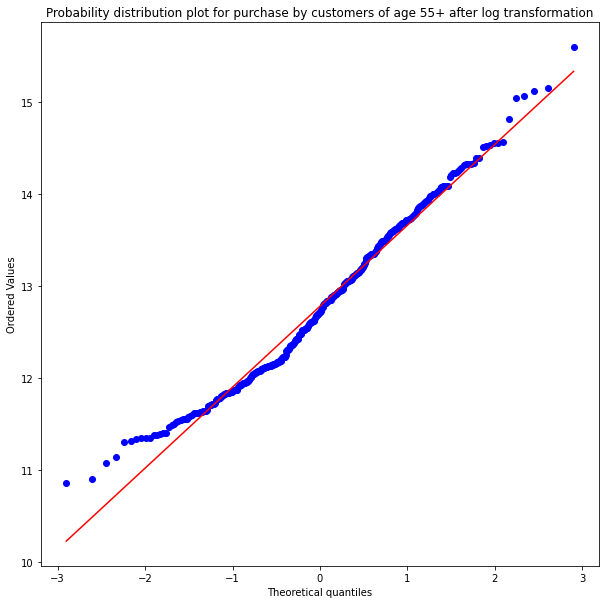

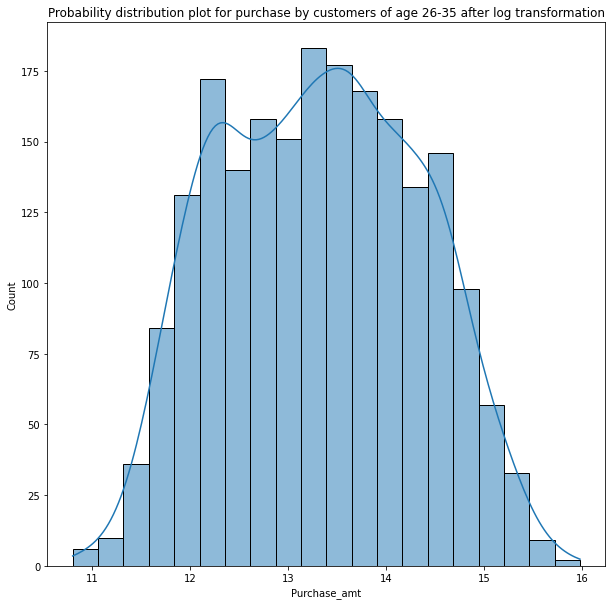

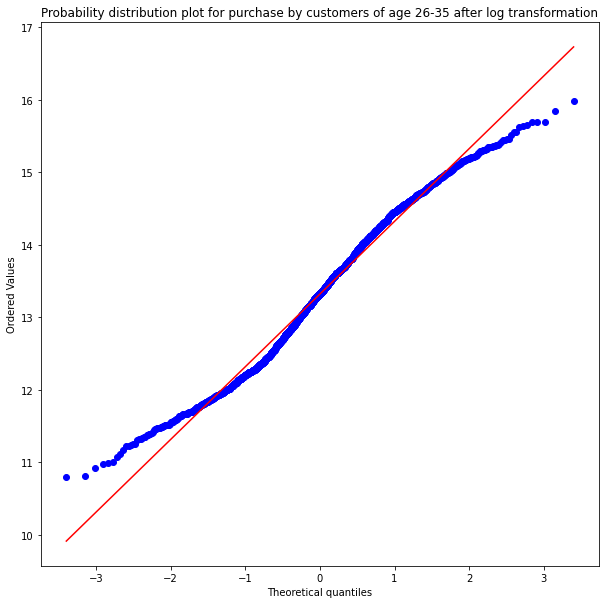

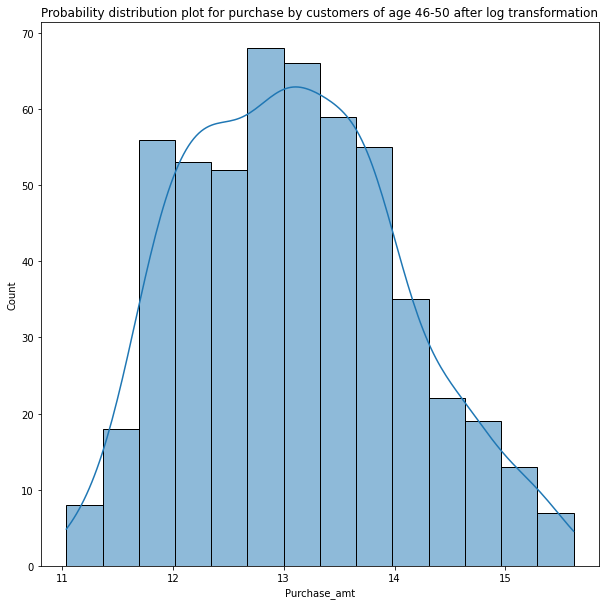

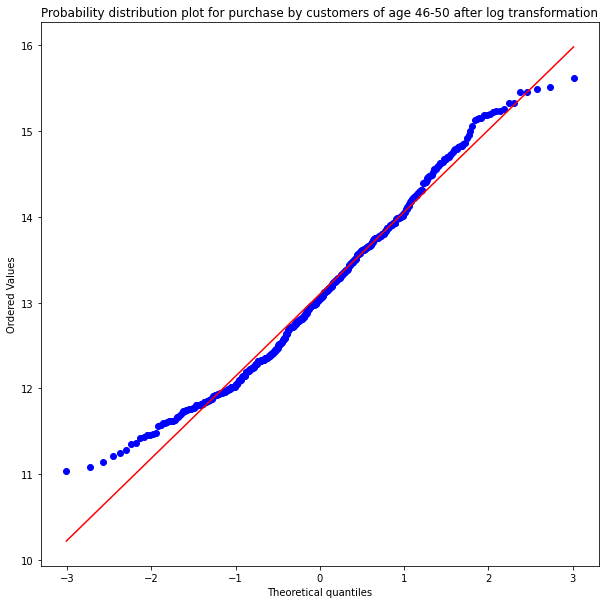

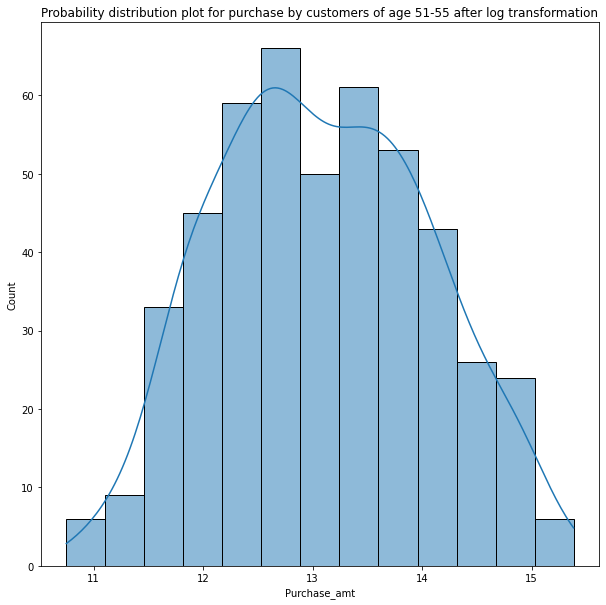

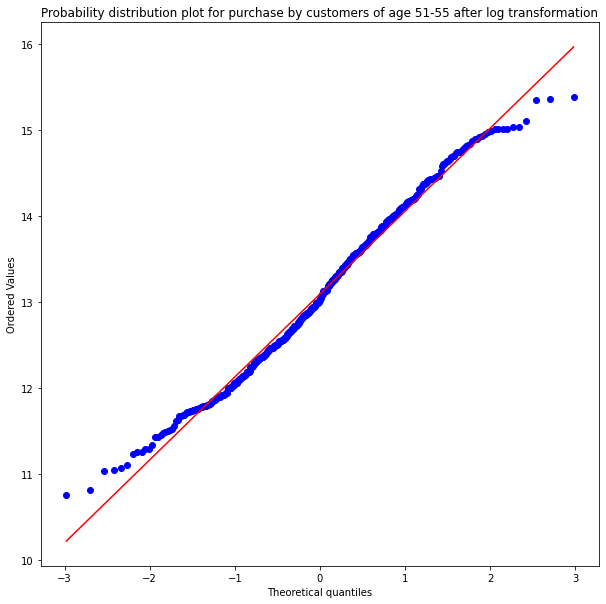

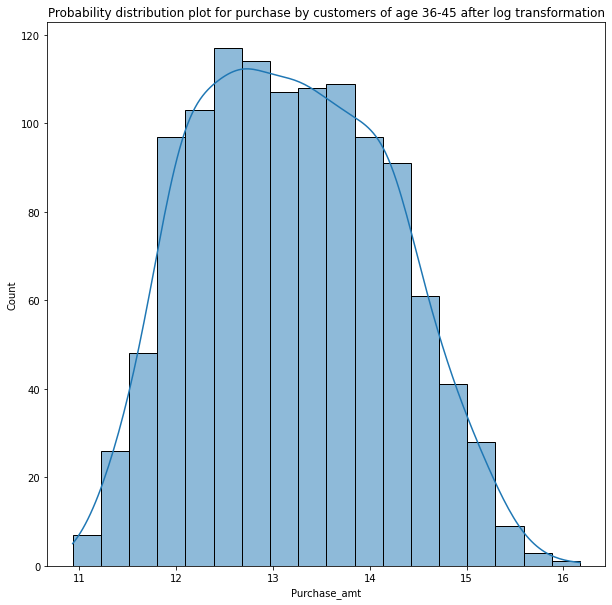

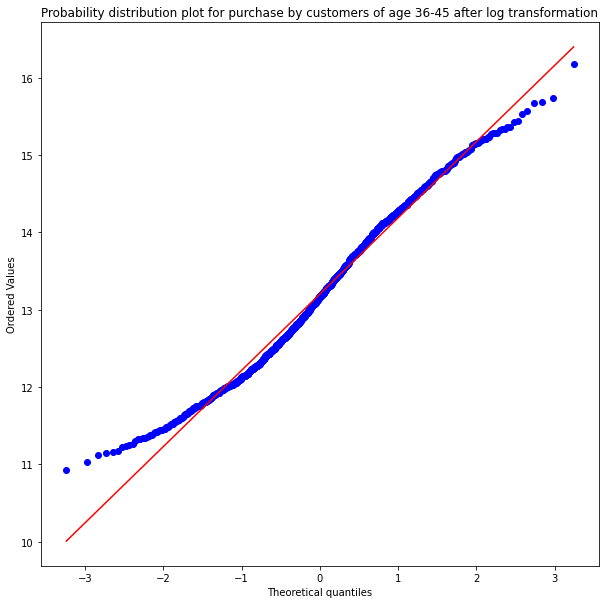

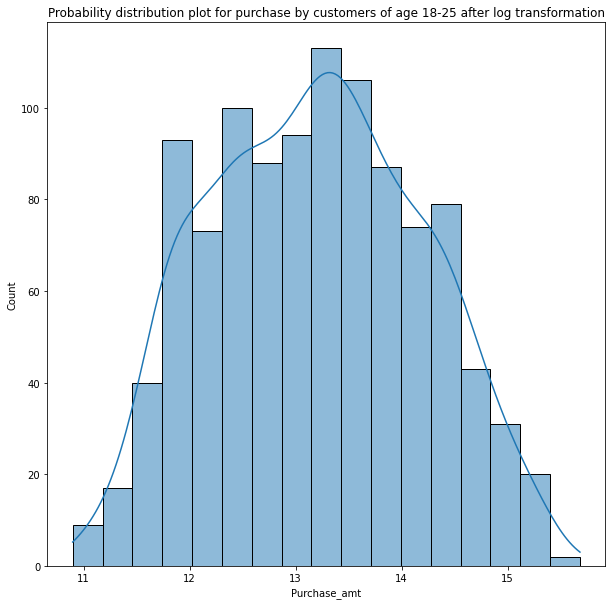

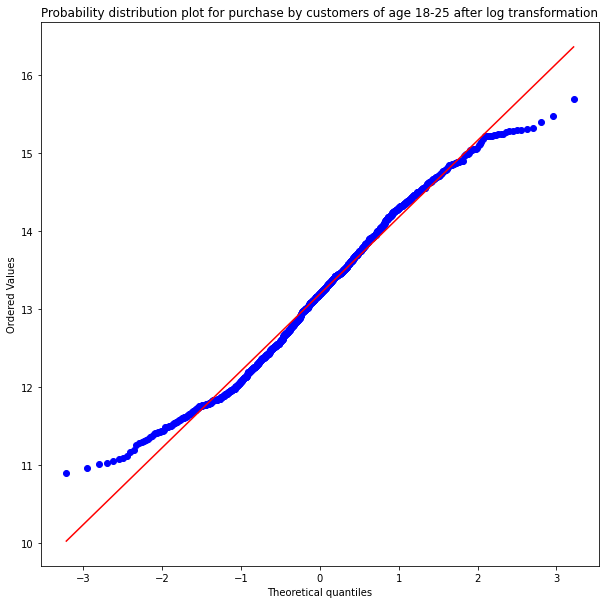

In [137]:
for i in age_data_pur["Age"].unique():
    plt.figure(figsize = (10,10))
    sns.histplot(age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"].apply(np.log), kde = True)
    plt.title(f"Probability distribution plot for purchase by customers of age {i} after log transformation")
    plt.show()
    plt.figure(figsize = (10,10))
    stats.probplot(age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"].apply(np.log), dist="norm", plot=py)
    plt.title(f"Probability distribution plot for purchase by customers of age {i} after log transformation")
    py.show() 
# As csn be seen fromthe below plots, the Purchase amount distribution for all age groups become approximately normal distributed
# after applying the log transformation.

In [138]:
# Getting the upper and lower limit of CI for the average purchase of all age groups.
age = []
upper_ci = []
lower_ci = []
N = []
for i in age_data_pur["Age"].unique():
    z = age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"].apply(np.log)
    age.append(i)
    N.append(len(z))
    std = z.std()/(len(z)**0.5)
    mean = z.mean()
    lower_ci_, upper_ci_ = stats.norm.interval(alpha = 0.5, loc = mean, scale = std)
    lower_ci.append(np.exp(lower_ci_))
    upper_ci.append(np.exp(upper_ci_))
age_pur_ci = pd.DataFrame(list(zip(age,N, lower_ci, upper_ci )), columns = ["Age","N", "lower_ci", "upper_ci" ])
age_pur_ci.sort_values("Age", inplace = True)    
age_pur_ci
# Note: The below mentioned CI was calculated using Z statistics.

,Age,N,lower_ci,upper_ci
0,0-17,218,394254.439989,427653.779712
6,18-25,1069,523892.687277,545699.445692
2,26-35,2053,601812.073114,620157.153610
5,36-45,1167,530917.492898,552087.675811
3,46-50,531,475350.309378,502856.893423
4,51-55,481,470383.281937,499143.055639
1,55+,372,345131.700595,367119.581492


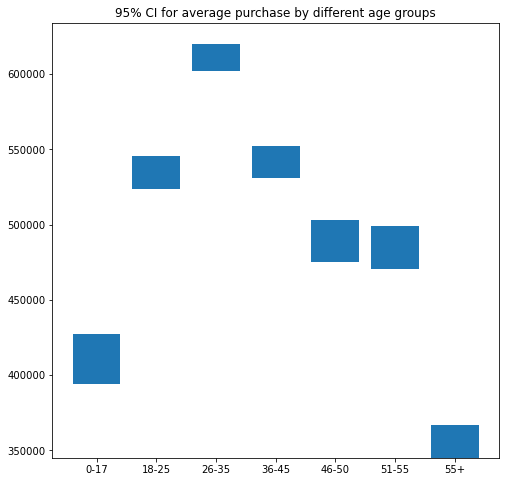

In [139]:
plt.figure(figsize =(8,8))
plt.bar(x = age_pur_ci["Age"], bottom = age_pur_ci["lower_ci"], height = age_pur_ci["upper_ci"]-age_pur_ci["lower_ci"])
plt.title("95% CI for average purchase by different age groups")
plt.show()
# Observation: As the age increases from 0-17 till 26-35, the average purchase made by customers increase. There is no overlap in 
# the CI intervals for these groups. 
# As age increase beyond 36, the average purchase made by a customer decreases.
# The 95% CI for age groups 46-50 and 51-55 overlap. Hence there is no conclusive data to interpret the difference between the
# average purchase between these age groups.
# Age group 26-35 has highest average Purchase whereas age group 55+ has lowest average purchase.

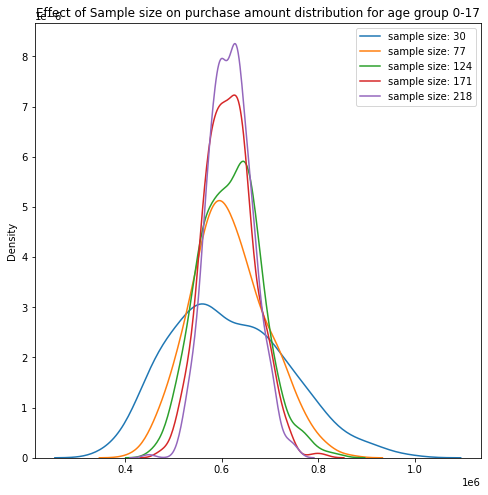

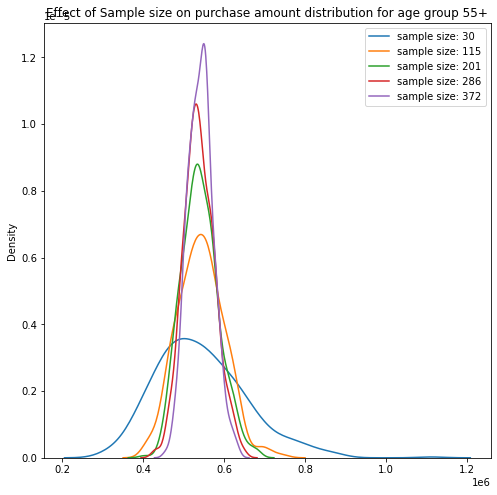

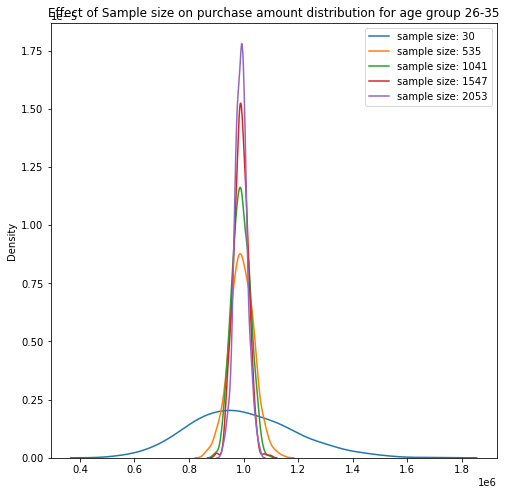

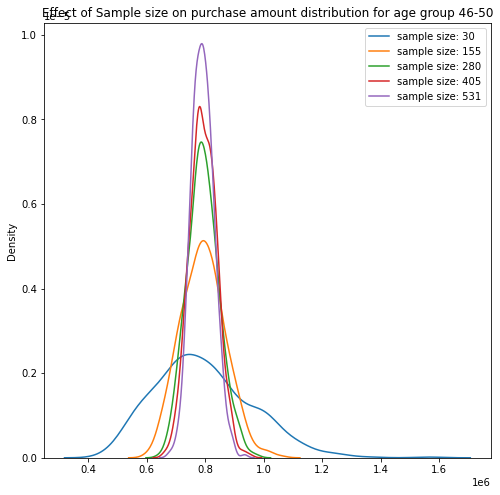

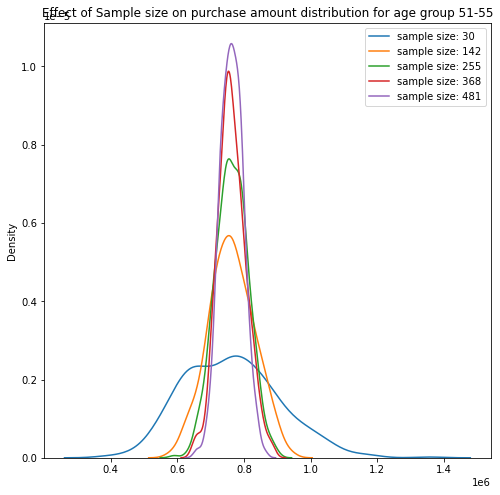

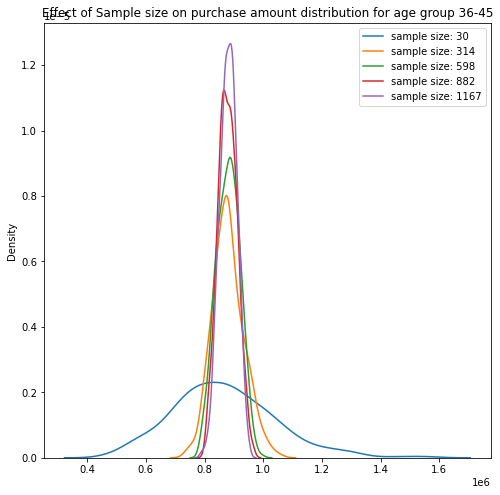

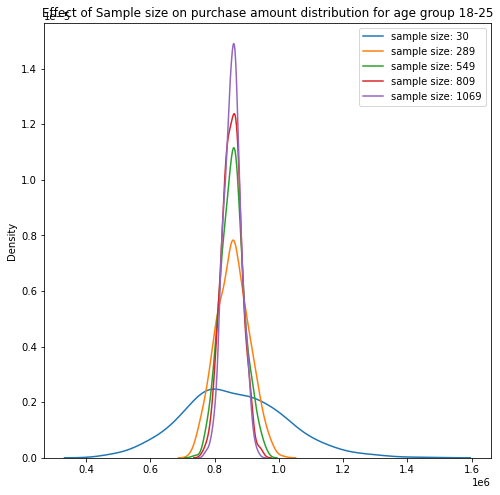

In [140]:
# Understanding the effect of increasing sample size on the CI for different age groups.
import warnings
warnings.filterwarnings('ignore')
for i in age_data_pur["Age"].unique():
    z = age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"].reset_index(drop = True)
    plt.figure(figsize = (8,8))
    for k in np.linspace(30,len(z),5):
        data = []
        for l in range(500):            
            x = np.random.randint(low = 0, high = len(z), size = int(k//1))
            data.append(z[x].mean())
        sns.distplot(data, hist = False, label = f"sample size: {int(k//1)}")
    plt.title(f"Effect of Sample size on purchase amount distribution for age group {i}")
    plt.legend()
    plt.show()
# As can be seen from the below graphs, as the sample size increases, the distribution has a sharper peak and a thinner tail.
# Thus width of 95% CI decreases as sample size increases and can be validated from the dataframe in the below cell in Jupyter 
# Notebook

In [141]:
# Constructing 95% CI using T test for different age groups and sample sizes
age = []
N = []
lower_ci = []
upper_ci = []
for i in age_data_pur["Age"].unique():        
    z = age_data_pur.loc[age_data_pur["Age"] == i, "Purchase_amt"].apply(np.log).reset_index(drop = True)
    for j in np.linspace(30,len(z)-1,3):
        data = []
        for k in range(100):
            x = np.random.randint(low = 0, high = len(z)-1, size = int(j))
            data.append(z[x].mean())
        lower_ci_, upper_ci_ = stats.t.interval(alpha = 0.05, df = len(z)-1, loc = np.array(data).mean(),scale = \
                                                np.array(data).std())
        age.append(i)
        N.append(int(j))
        lower_ci.append(np.exp(lower_ci_))
        upper_ci.append(np.exp(upper_ci_))
pd.DataFrame(list(zip(age,N,lower_ci, upper_ci)), columns = ["Age", "N (sample size)", "Lower_limit_CI", "Upper_Limit_CI"])

,Age,N (sample size),Lower_limit_CI,Upper_Limit_CI
0,0-17,30,395085.881735,402493.980699
1,0-17,123,405842.342727,410011.842968
2,0-17,217,410250.415536,413657.122308
3,55+,30,344972.619215,352507.888953
4,55+,200,355191.503401,357718.103090
5,55+,371,357442.691322,359325.462537
6,26-35,30,609428.070524,622735.941944
7,26-35,1041,610639.224191,612899.398630
8,26-35,2052,609055.566109,610745.865614
9,46-50,30,472345.102078,482362.216734


In [142]:
# Observation: 
# As seen from the graphs above, there is no overlap between 95% CI for average purchases made by Male and Female 
# customers. 95% CI for purchases made by Male is higher than purchase made by Female.
# As male customers are expected to spend more then Female customers, from a product category where both Male and
# Female customers purchases, Walmart can show higher priced products to Males as compared to Females.

# The 95% CI for average purchase made by customers with different Marital Status overlap. Hence, there is no 
# sufficient data available to conclude any difference between average purchases made by these groups with 95% 
# confidence. Since there is overlap in 95% CI, walmarts should not use Marital Status to predict amount spent by
# a customer. However, further profiling needs to be done to understand the impact of Marital Status on different
# Product Categories.

# There is no overlap between any two successive age groups except age group 46-50 and 51-55.
# The 95% CI for average purchase by an age group is maximum for group 26-35 and minimum for group 55+.
# The 95% CI for average purchase increases till age 26-35 and then starts decreasing.
# All age groups purchase from different Product Categories. If there are products which can be used across all age
# groups, Walmart can suggests higher priced products to Age group 26-35 and lower priced roducts to 55+ age groups.
# As the average purchase made by age groups 46-50 and 51-55 are almost similar, Walmart can show similar priced 
# products to them. 
# If new products are added to a Product category and is high priced as compared to other products in the category,
# It should be more recommended to age groups 26-35, 18-25 and 36-45. 
# If the new product is medium priced, it can recommended to 18-25, 36-45, 46-50 and 51-55.
# If it is low priced, it can be recommended to 0-17, 46-50 and 51-55 and 55+. 

In [143]:
# Recommndations:
# Product Category 8, 5 and 1 have maximum 1047, 967 and 493 products and conprise 16.76, 18.48 and 37.48% of the total
# purchases. These account for total 74.5% of total purchases for Walmart.

# Walmart must ensure adequate stocks of the most selling products in these 3 categories. They 
# can benchmark the % increase in Sales for these 3 product categories over the upcoming Black Fridays
# to ensure the revenue of Walmart does not fall. If the revenue falls below the benchmarked value, 
# they can offer discount on most selling products in these categories to attract more customers.
# For this they can target the products which are performing well in these categories. 
# There are total 26 products in Category 1, 87 products in Category 5 and 99 products in category 8, which are selling
# very well # compared to other products in the same catgeory. For top products having highest customer base, refer 
# cell 25. For top products having highest purchase amount refer cell 23.

# In order to get rid off the extra stocks of the products that do not have higher customer count
# and purchase amount, Walmart can offer them at large discounted prices to avoid any loss.
# These include products which are having low customer count and low purchase amount. Such list
# of products are in the dataframe in Jupyter cell 26. There are a total of 898 products where
# % Purchase is less than 25 percentile and Customer count is also less than 25 percentile. 
# Walmart must try to offer excessive discoun on such products to avoid high losses on these
# products and avoid high stocks of these products in Stores on Black Friday.

# Refer Jupyter lines 37 through 56 for understanding the purchase behaviour of customers in different age groups.
# While 36.16% of total purchase come from Product Category 1 in age group 0-17, only 23.73%
# of total customers in the age group have purchased a product. 
# While average purchase made by a customer in Product Category 1 and age group 55+ is 14065, 
# only 20.5% of Customers have purchased a product from this Product Category which is lower as compared to other 
# age groups. Hence, Walmart can provide targetted discount on Products in category 1 for 
# age groups 55+. Customers in age group 0-17 purchase more from Product Categories 3 and 4.
# Hence if Walmart wishes to attract more customers from these age groups, it can offer products at 
# higher discounts in these categories for these age groups.
# 28% of customers in age group 55+ purchase from Category 8 and have highest average purchase 
# by a customer in any age group for this category. If Walmart wants to attract more customers in 
# these age groups, they can offer products in these age group at a discounted category.

# The dataframe in Jupyter Line 80 confirms that there are a total of 1840 products which have
# been purchased across all age groups. For Product P00034742, across a particular age group,
# maximum 464 customers have purchased it while a minimum of 55 customers in another age group have purchased
# it. 

# The dataframe constructed in line 83, consists of Product ID which have been purchases across
# 4 or less age groups.If Walmart wants to target Customers across all age groups, it should target those
# product id's which are available across all age groups and have have significant customer base.
# Refer dataframe 81 for products which have atleast 30 customers across all age groups.

# In the analysis, we have also tried to figure out product categories which are biased to a particular gender.
# Refer line 90 in the Jupyter Notebook. 
# We can say that a particular gender prefers a paricular product category if the difference in average purchase 
# between Male and Female Genders is greater than 1000 and the percentage difference in customers in the genders
# is different by more than 5% for a particular category. As per this assumption, we have found categories 10, 11,
# 14, 15, 16, 17, 18, 2, 6 and 7 to be preferred by a particular gender.

# By using T-test we have found that average Purchase amount made by different genders in Product Categories 3,12,5,4,2,
# 6,14,13 and 18 is having p values less than 0.05. Refer line 91 in the Jupyter Notebook for this analysis. 